In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px

In [182]:
df_final=pd.read_csv('/content/cleaned_data (2).csv')

In [183]:
df_final.head()

rider_id   age  ratings  restaurant_latitude  restaurant_longitude  \
0   INDORES13DEL02   37.0      4.9            22.745049             75.892471   
1   BANGRES18DEL02   34.0      4.5            12.913041             77.683237   
2   BANGRES19DEL01   23.0      4.4            12.914264             77.678400   
3  COIMBRES13DEL02   38.0      4.7            11.003669             76.976494   
4   CHENRES12DEL01   32.0      4.6            12.972793             80.249982   

   delivery_latitude  delivery_longitude  order_date     weather traffic  ...  \
0          22.765049           75.912471  2022-03-19       sunny    high  ...   
1          13.043041           77.813237  2022-03-25      stormy     jam  ...   
2          12.924264           77.688400  2022-03-19  sandstorms     low  ...   
3          11.053669           77.026494  2022-04-05       sunny  medium  ...   
4          13.012793           80.289982  2022-03-26      cloudy    high  ...   

   time_taken city_name order_day  order_month order_day_of_week is_weekend  \
0          24      INDO        19            3          saturday          1   
1          33      BANG        25            3            friday          0   
2          26      BANG        19            3          saturday          1   
3          21     COIMB         5            4           tuesday          0   
4          30      CHEN        26            3          saturday          1   

   order_time_hour order_time_of_day  pickup_time   distance  
0             11.0           morning         15.0   3.025149  
1             19.0           evening          5.0  20.183530  
2              8.0           morning         15.0   1.552758  
3             18.0           evening         10.0   7.790401  
4             13.0         afternoon         15.0   6.210138  

[5 rows x 26 columns]

In [184]:
df_final.isna().sum().rename('missing_values')

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
order_time_hour         1640
order_time_of_day          0
pickup_time             1640
distance                3630
Name: missing_values, dtype: int64

In [185]:
# number of rows with missing values

df_final.isna().any(axis=1).sum()/len(df_final)*100

np.float64(16.34653421827612)

The initial percentage of missing data was **9.2%** which has now increased to **16.3%** because we tranformed zero values in the latitude/longitude column with **nan**

In [186]:
# check for duplicate rows

df_final.duplicated().sum()

np.int64(0)

There are no duplicate rows in the data

In [187]:
df_final.isna().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
order_time_hour         1640
order_time_of_day          0
pickup_time             1640
distance                3630
dtype: int64

In [188]:
# Separating Numerical and Categorical Columns
numerical_columns=df_final.columns[[1,2,3,4,5,6,16,24,25]].tolist()
categorical_columns=[col for col in df_final.columns.tolist() if col not in numerical_columns]

print(f'There are {len(numerical_columns)} numerical columns and {len(categorical_columns)} categorical columns')

There are 9 numerical columns and 17 categorical columns


In [189]:
# Statistical Summary of Numerical Data

df_final[numerical_columns].describe()

age       ratings  restaurant_latitude  restaurant_longitude  \
count  43648.000000  43594.000000         41872.000000          41872.000000   
mean      29.555008      4.635287            18.913696             76.921664   
std        5.761482      0.313827             5.467265              3.503107   
min       20.000000      2.500000             9.957144             72.768726   
25%       25.000000      4.500000            12.986047             73.897902   
50%       30.000000      4.700000            19.065838             76.618203   
75%       35.000000      4.900000            22.751234             78.368855   
max       39.000000      5.000000            30.914057             88.433452   

       delivery_latitude  delivery_longitude    time_taken   pickup_time  \
count       41872.000000        41872.000000  45502.000000  43862.000000   
mean           18.977356           76.985325     26.297591      9.989399   
std             5.469056            3.503260      9.386419      4.087516   
min             9.967144           72.778726     10.000000      5.000000   
25%            13.065996           73.940327     19.000000      5.000000   
50%            19.124049           76.662620     26.000000     10.000000   
75%            22.820040           78.405467     32.000000     15.000000   
max            31.054057           88.563452     54.000000     15.000000   

           distance  
count  41872.000000  
mean       9.719296  
std        5.602890  
min        1.465067  
25%        4.657655  
50%        9.193014  
75%       13.680920  
max       20.969489

In [190]:
# Statistical Summary of Categorical Data

(
    df_final.assign(**{
        col: df_final[col].astype('object') for col in categorical_columns
    })
    .describe(include='object').T
)

count unique              top     freq
rider_id               45502   1320  PUNERES01DEL01        67
order_date             45502     44       2022-03-15     1190
weather                44977      6              fog     7654
traffic                44992      4              low    15477
vehicle_condition      45502      4                2    15034
type_of_order          45502      4            snack    11512
type_of_vehicle        45502      4       motorcycle    26427
multiple_deliveries  44509.0    4.0              1.0  28109.0
festival               45274      2               no    44380
city_type              44304      3    metropolitian    34029
city_name              45502     22              JAP     3439
order_day              45502     30                3     2323
order_month            45502      3                3    31919
order_day_of_week      45502      7        wednesday     7077
is_weekend             45502      2                0    32995
order_time_hour      43862.0   17.0             21.0   4686.0
order_time_of_day      45502      5            night    18312

In [191]:
df_final.drop(df_final[df_final['time_taken'].isna()].index,inplace=True)

# Functions to Perform Analysis

In [192]:
def numerical_analyses(dataframe,num_column,cat_column=None,bins='auto'):
  # create figure size
  fig=plt.figure(figsize=(15,10))
  # generate the layout
  grid=GridSpec(nrows=2,ncols=2,figure=fig)

  ax1=fig.add_subplot(grid[0,0])
  ax2=fig.add_subplot(grid[0,1])
  ax3=fig.add_subplot(grid[1,:])

  # plot the kdeplot
  sns.kdeplot(data=dataframe,x=num_column,ax=ax1)
  # plot the boxplot
  sns.boxplot(data=dataframe,x=num_column,ax=ax2)
  # plot the histogram
  sns.histplot(data=dataframe,x=num_column,ax=ax3,bins=bins,hue=cat_column,kde=True)

  plt.tight_layout()
  plt.show()

def numerical_categorical_analysis(dataframe,num_column,cat_column):
  fig , (ax1,ax2) = plt.subplots(2,2,figsize=(15,7.5))
  # plot the bardplot
  sns.barplot(data=dataframe,x=cat_column,y=num_column,ax=ax1[0])
  # plot the boxplot
  sns.boxplot(data=dataframe,x=cat_column,y=num_column,ax=ax1[1])
  # plot the violinplot
  sns.violinplot(data=dataframe,x=cat_column,y=num_column,ax=ax2[0])
  # plot strip plot
  sns.stripplot(data=dataframe,x=cat_column,y=num_column,ax=ax2[1])

  plt.tight_layout()
  plt.show()


def categorical_anaylyses(dataframe,cat_column):

  display(
      pd.DataFrame({
          'count' : dataframe[cat_column].value_counts(),
          'percentage' : (dataframe[cat_column].value_counts()/len(dataframe)*100).round(2).astype(str) + '%'
      })
  )

  print('*' * 50)

  unique_categories=dataframe[cat_column].unique()
  number_of_unique_categories=len(unique_categories)

  print(f'There are {number_of_unique_categories} unique categories in the {cat_column} column')
  print('*' * 50)
  print(f'The unique categories are {unique_categories}')
  sns.countplot(data=dataframe,x=cat_column)
  plt.xticks(rotation=45)
  plt.show()


def multivariate_analysis(dataframe,num_column,cat_column_1,cat_column_2):
  fig , (ax1,ax2) = plt.subplots(2,2,figsize=(15,7.5))
  # plot the barplot
  sns.barplot(data=dataframe,x=cat_column_1,y=num_column,hue=cat_column_2,ax=ax1[0])
  # plot the box plot
  sns.boxplot(data=dataframe,x=cat_column_1,y=num_column,hue=cat_column_2,gap=0.1,ax=ax1[1])
  # plot the violin plot
  sns.violinplot(data=dataframe,x=cat_column_1,y=num_column,hue=cat_column_2,ax=ax2[0])
  # plot the strip plot
  sns.stripplot(data=dataframe,x=cat_column_1,y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])

  plt.tight_layout()
  plt.show()


def chi_2_test(dataframe, col1, col2, alpha= 0.05):
  data = (
      dataframe.loc[:, [col1, col2]]
      .dropna()
  )
  # create contingency table
  contingency_table = pd.crosstab(data[col1], data[col2])
  # perform chi-squared test
  _, p_val, _, _ = chi2_contingency(contingency_table)
  print(p_val)
  if p_val <= alpha:
      print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
  else:
      print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")



def anova_test(dataframe, num_col, cat_col, alpha=0.05):
  data = (
      dataframe.loc[:, [num_col, cat_col]]
      .dropna()
  )
  cat_group = data.groupby(cat_col)
  groups = [group[num_col].values for _, group in cat_group]
  f_stat, p_val = f_oneway(*groups)
  print(p_val)
  if p_val <= alpha:
      print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
  else:
      print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")



def test_for_normality(dataframe, column_name, alpha=0.05):

  data = dataframe[column_name]
  print("Jarque Bera Test for Normality")
  _, p_val = jarque_bera(data)
  print(p_val)
  if p_val <= alpha:
      print(f"Reject the null hypothesis. The data is not normally distributed.")
  else:
      print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")




# Column Wise Analyses

In [193]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'order_time_hour',
       'order_time_of_day', 'pickup_time', 'distance'],
      dtype='object')

# Time Taken (Target)

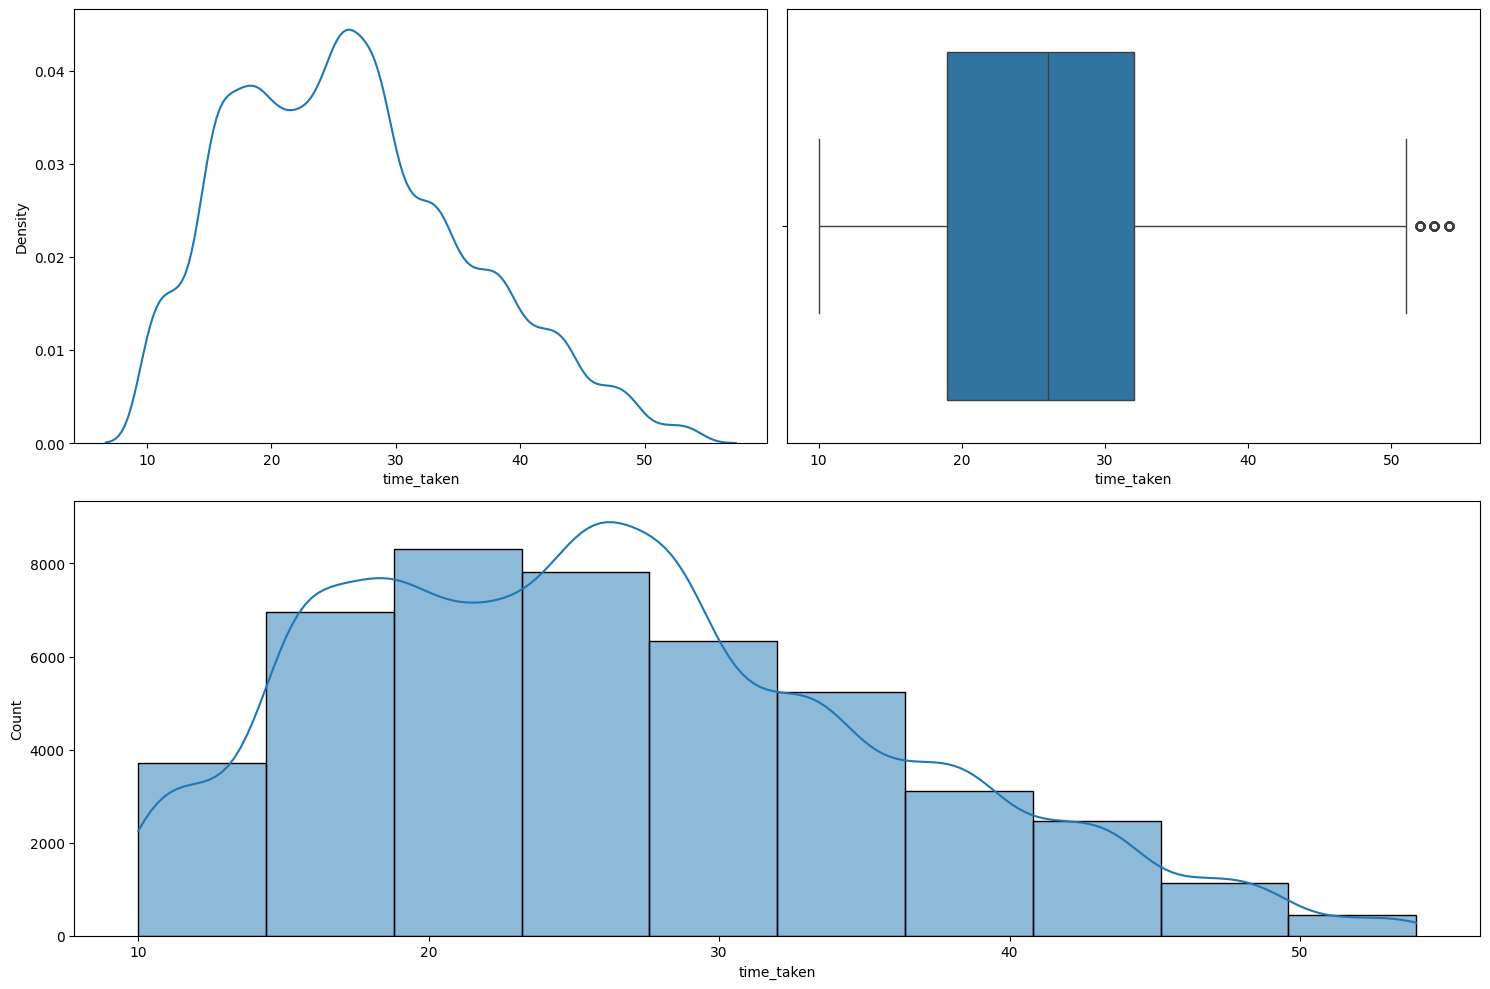

In [194]:
numerical_analyses(df_final,'time_taken',bins=10)

**Observations**

1.   The target column is not fully continuous in nature
2.   The target column shows dual modality with two peaks.One peak aroud 17-18 (min) and the other aroud 26-27 (min).

3.  The target column has some extreme points which can be thought of as outliers but they are just extreme and rare,not outliers.50 (min) time is possible for delivery in certain rare cases.






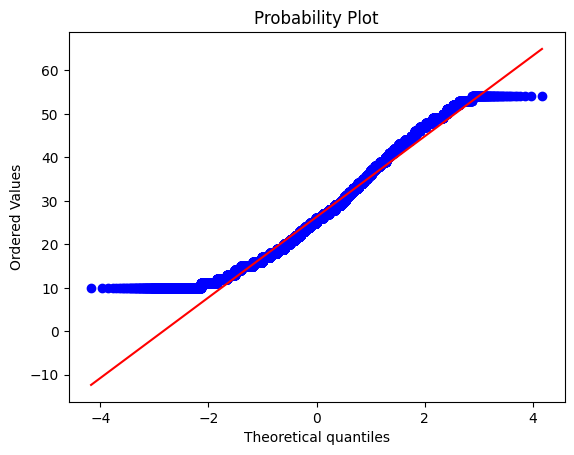

In [195]:
probplot(df_final['time_taken'].dropna(),plot=plt)
plt.show()

The Q-Q plot shows that the data roughly follows a normal distribution, but there is some deviation at the extreme values (tails), indicating the presence of outliers or heavier/lighter tails than expected.

In [196]:
# test for normaility

test_for_normality(df_final,'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


 Tests normality by evaluating:

Skewness (symmetry of the distribution)

Kurtosis (tailedness of the distribution)

 Best suited for large datasets

 Fast and simple to compute

Commonly used in regression diagnostics to test residuals

In [197]:
# checking out the row where data is acting as outlier

target_25_precentile,target_75_precentile=np.percentile(df_final['time_taken'],[25,75])
iqr=target_75_precentile-target_25_precentile
lower_bound=target_25_precentile-(1.5*iqr)
upper_bound=target_75_precentile+(1.5*iqr)
df_final[(df_final['time_taken']<lower_bound) | (df_final['time_taken']>upper_bound)]['traffic'].value_counts()

traffic
jam     241
high     24
Name: count, dtype: int64

In [198]:
df_final[(df_final['time_taken']<lower_bound) | (df_final['time_taken']>upper_bound)]['weather'].value_counts()

weather
fog           57
sunny         51
windy         44
cloudy        44
stormy        37
sandstorms    32
Name: count, dtype: int64

In [199]:
avg_distance=df_final['distance'].mean()
avg_distance_extreme=df_final[(df_final['time_taken']<lower_bound) | (df_final['time_taken']>upper_bound)]['distance'].mean()

print(avg_distance,avg_distance_extreme)

9.719296323199579 13.29215081388658


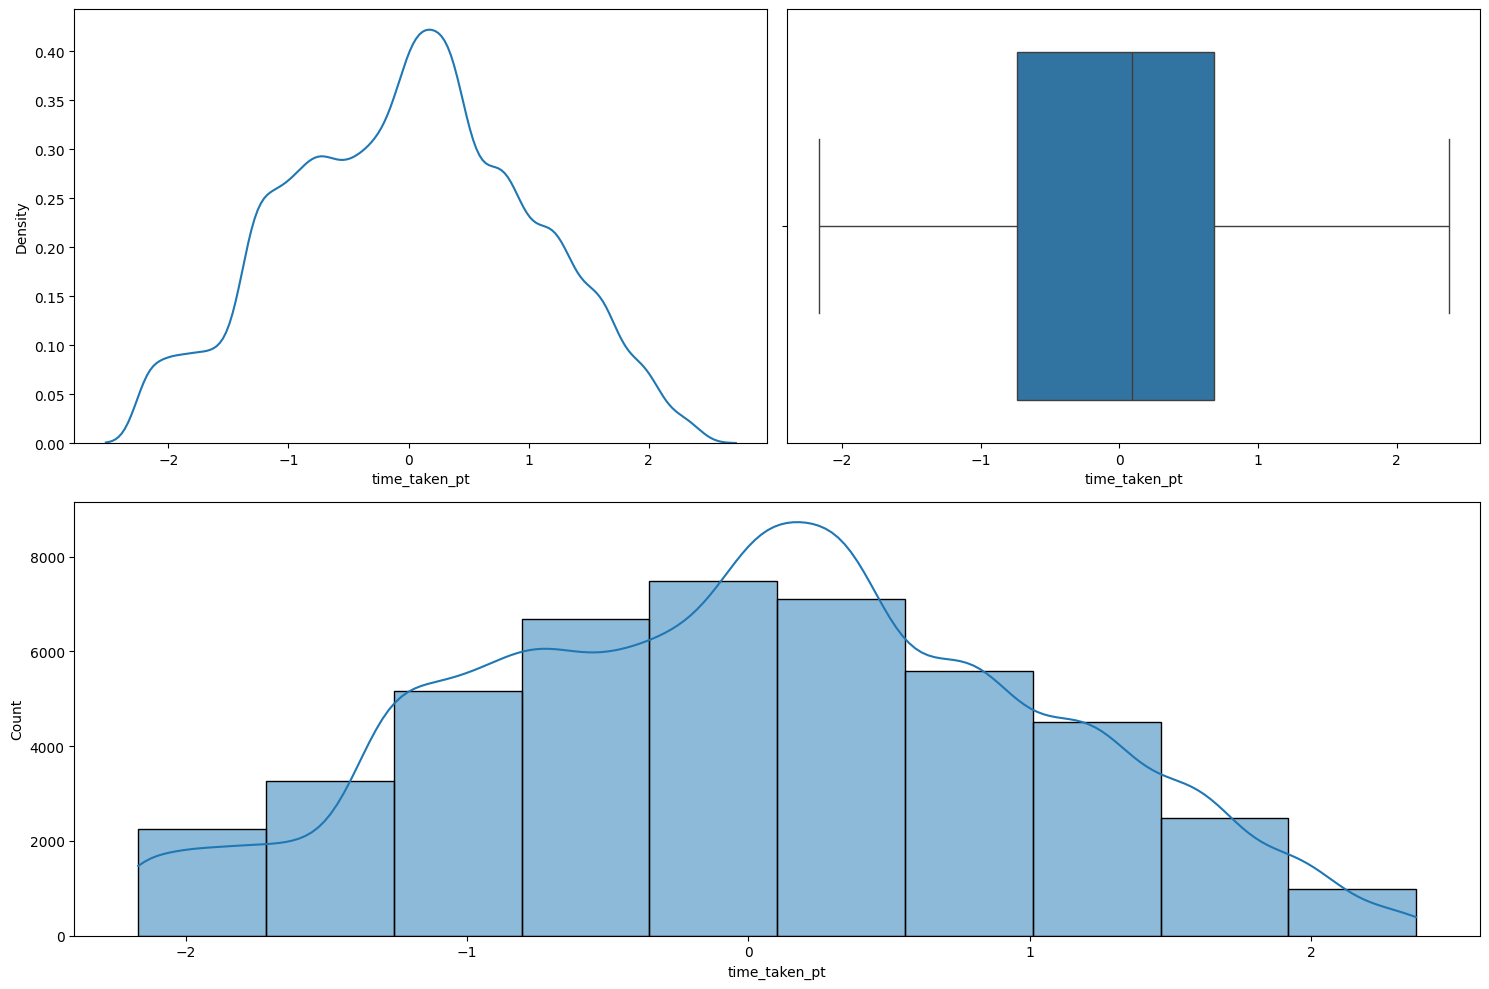

In [200]:
# fix target column using transformation

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df_final['time_taken_pt'] = pt.fit_transform(df_final[['time_taken']])

numerical_analyses(df_final, 'time_taken_pt', bins=10)

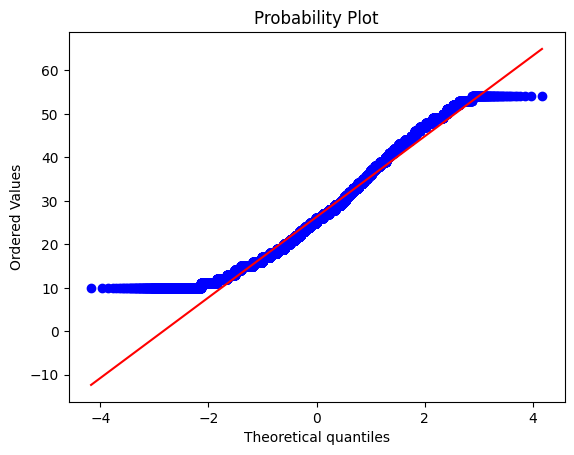

In [201]:
probplot(df_final['time_taken'],plot=plt)
plt.show()

# Rider_ID

In [202]:
df_final['rider_id']

0          INDORES13DEL02 
1          BANGRES18DEL02 
2          BANGRES19DEL01 
3         COIMBRES13DEL02 
4          CHENRES12DEL01 
               ...        
45497       JAPRES04DEL01 
45498       AGRRES16DEL01 
45499      CHENRES08DEL03 
45500     COIMBRES11DEL01 
45501    RANCHIRES09DEL02 
Name: rider_id, Length: 45502, dtype: object

In [203]:
df_final[['rider_id', 'age', 'ratings']].sort_values(by='rider_id')


rider_id   age  ratings
92     AGRRES010DEL01   34.0      4.7
35379  AGRRES010DEL01   34.0      4.6
33641  AGRRES010DEL01   25.0      4.9
12416  AGRRES010DEL01   34.0      4.5
20201  AGRRES010DEL01   34.0      4.9
...                ...   ...      ...
29601   VADRES20DEL03   20.0      4.9
17963   VADRES20DEL03   35.0      4.9
37449   VADRES20DEL03   39.0      4.6
28371   VADRES20DEL03   39.0      4.2
20802   VADRES20DEL03   27.0      5.0

[45502 rows x 3 columns]

In [204]:
df_final[['rider_id', 'age', 'ratings']].sort_values(by='rider_id').dropna().duplicated(keep=False).sum()

np.int64(10155)

In [205]:
(
    df_final.loc[
        df_final[['rider_id', 'age', 'ratings']]
        .duplicated(keep=False),
        ['rider_id', 'age', 'ratings']
    ].dropna().
    sort_values(by='rider_id')
)





rider_id   age  ratings
18533  AGRRES03DEL02   24.0      4.9
40285  AGRRES03DEL02   24.0      4.9
28473  AGRRES03DEL03   30.0      4.7
26275  AGRRES03DEL03   30.0      4.7
36131  AGRRES06DEL02   36.0      4.9
...               ...   ...      ...
12742  VADRES20DEL02   28.0      4.5
5094   VADRES20DEL03   35.0      4.9
17963  VADRES20DEL03   35.0      4.9
21957  VADRES20DEL03   37.0      4.9
5146   VADRES20DEL03   37.0      4.9

[10155 rows x 3 columns]

Not useful for our analysis because while some riders have exact duplicate records, others have different values for age or rating. Therefore, we can impute the missing values using the available information for each rider.

# Age

In [206]:
df_final['age'].dtype

dtype('float64')

In [207]:
df_final['age'].describe()

count    43648.000000
mean        29.555008
std          5.761482
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

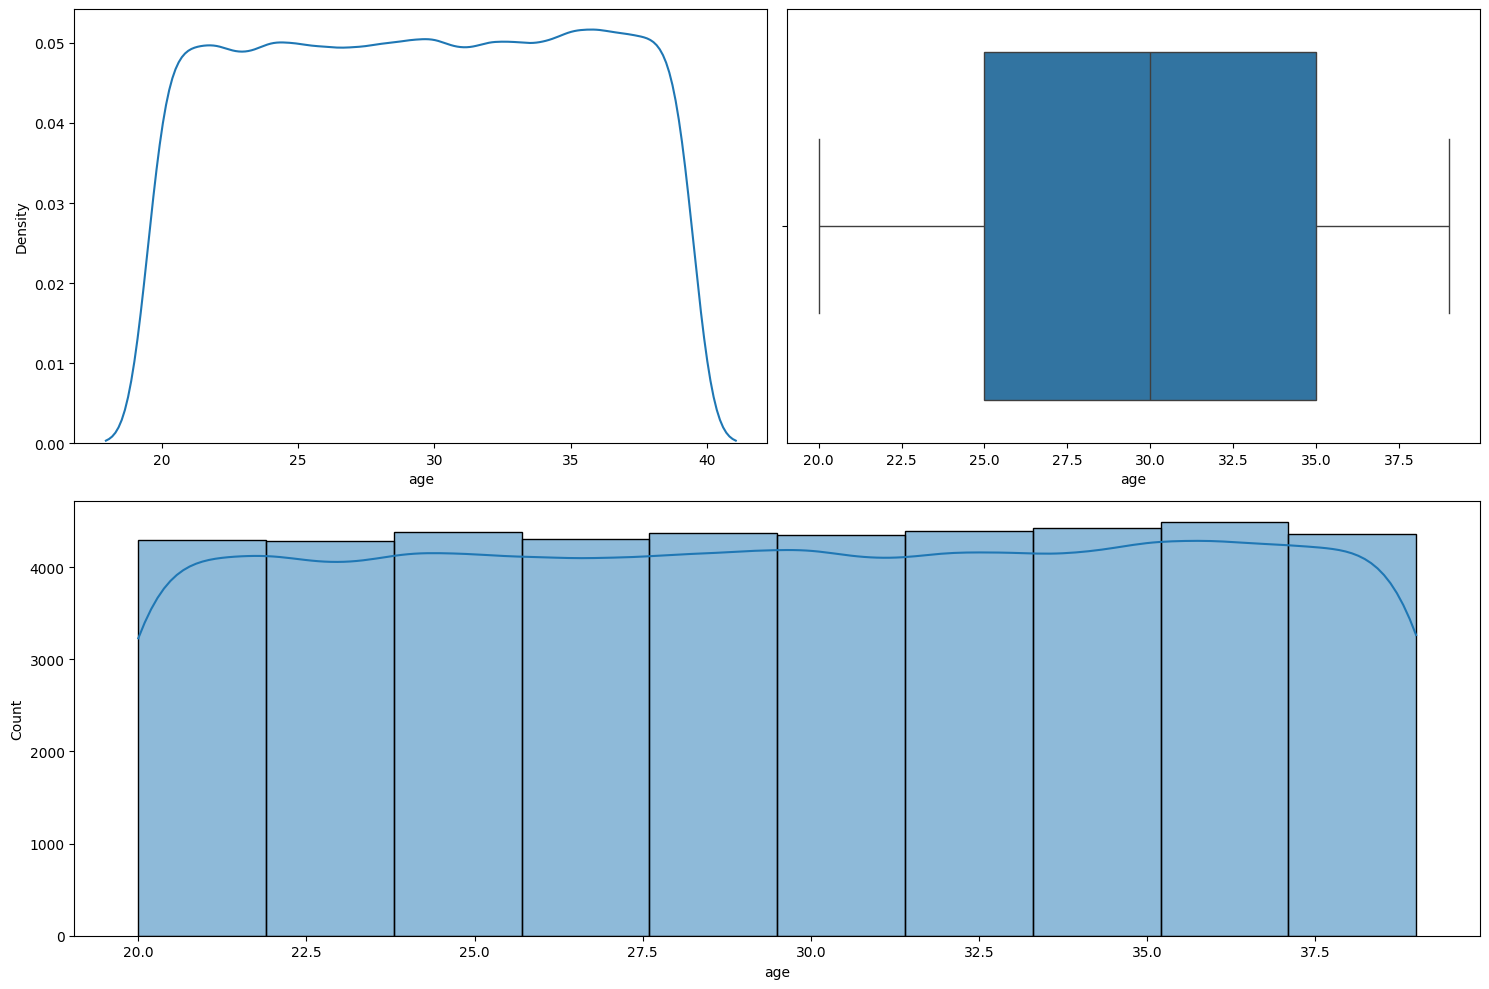

In [208]:
numerical_analyses(df_final,'age',bins=10)

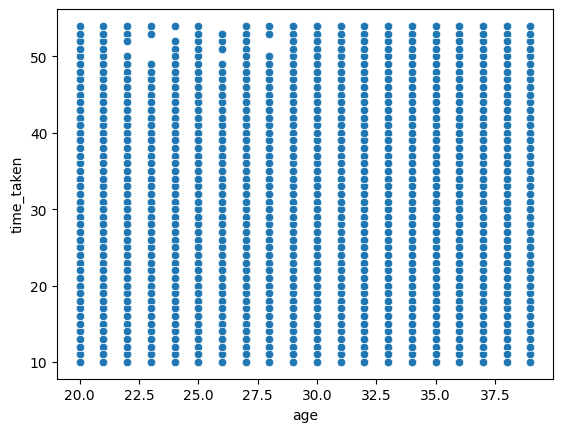

In [209]:
# relation_ship between target anf age column

sns.scatterplot(df_final,x='age',y='time_taken')
plt.show()

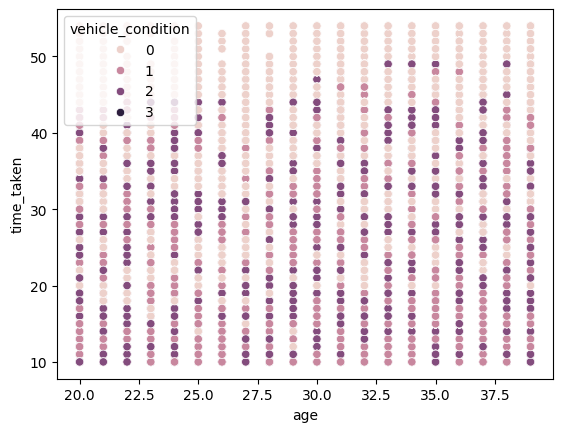

In [210]:
sns.scatterplot(df_final,x='age',y='time_taken',hue='vehicle_condition')
plt.show()

# Ratings

In [211]:
df_final['ratings'].isna().sum()

np.int64(1908)

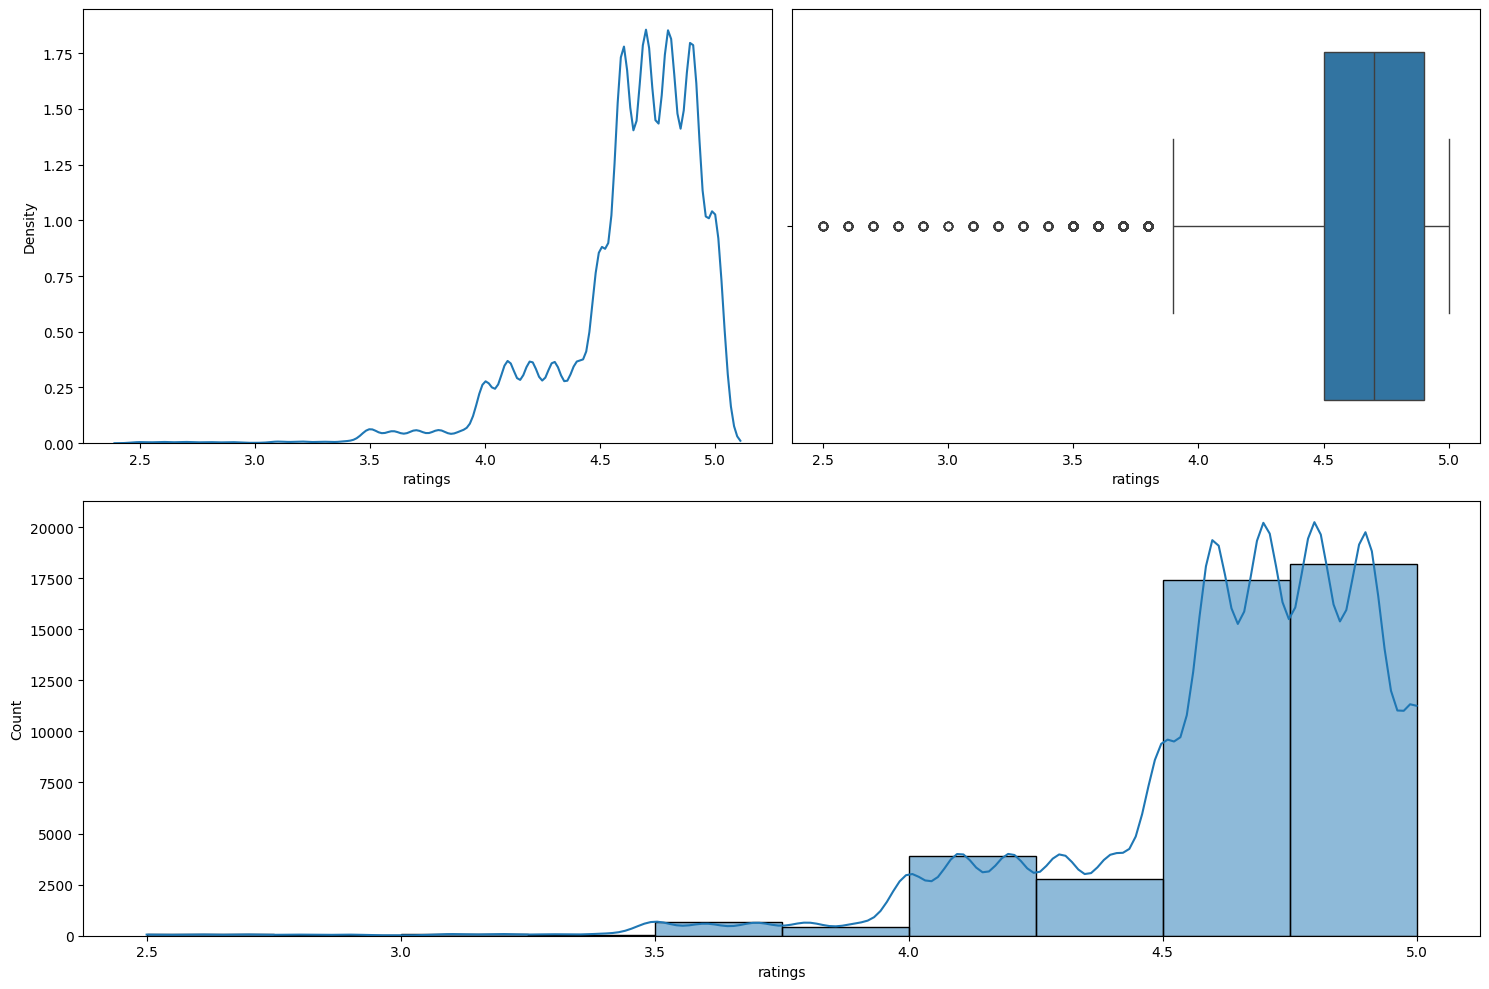

In [212]:
numerical_analyses(df_final,'ratings',bins=10)

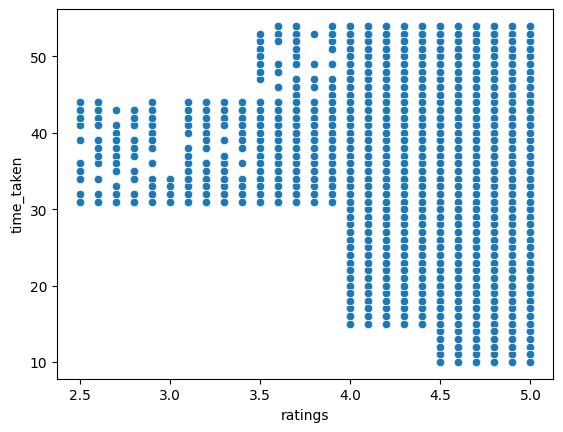

In [213]:
sns.scatterplot(df_final,x='ratings',y='time_taken')
plt.show()

It seems the rider with more ratings get more orders                    
Higher ratings means more work and more income oppotunities

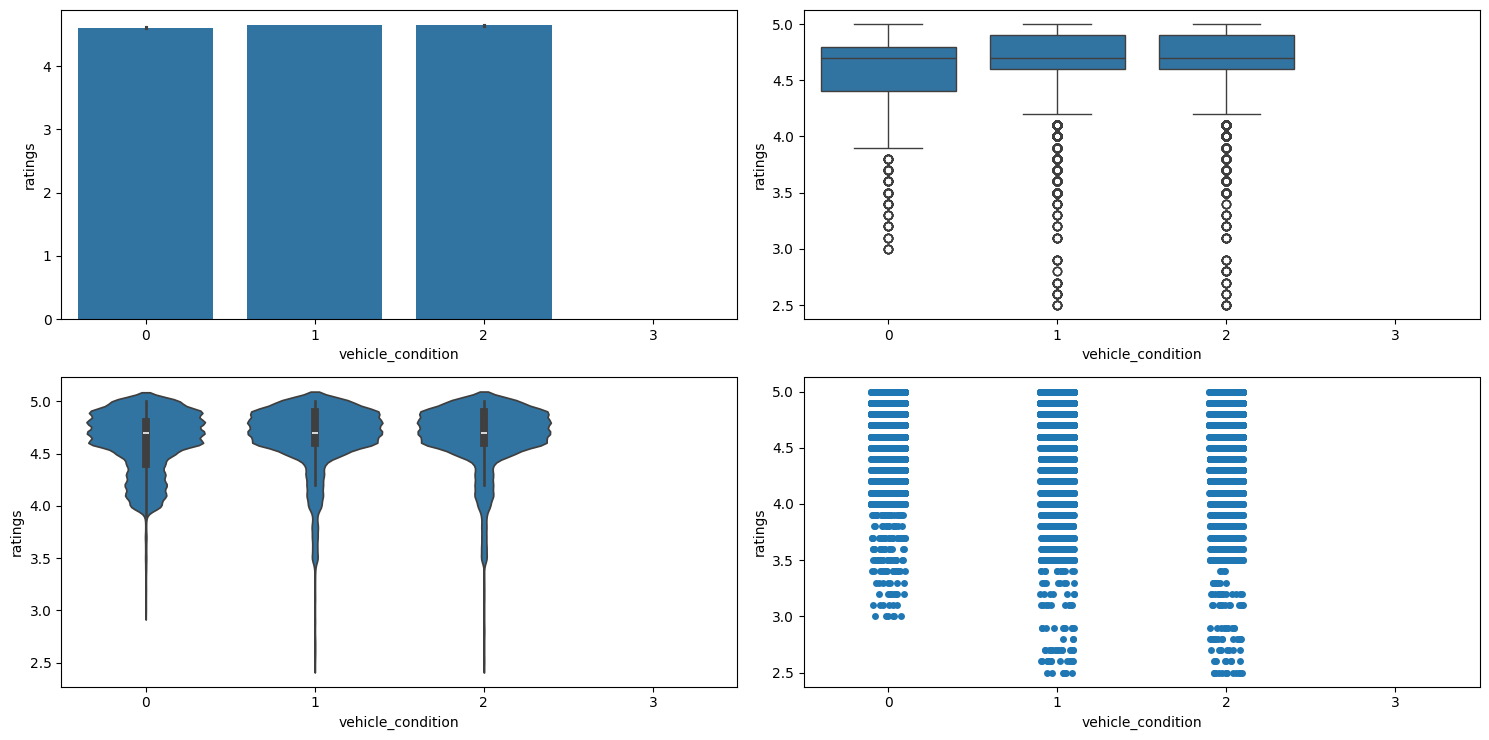

In [214]:
numerical_categorical_analysis(df_final,'ratings','vehicle_condition')



*   The more worst the vehicle condition is, the more lower the ratings get.
*   The category 3 has no data means there are NaN values. This simply means that customer avoid rating there rider even rating of 1 when the vehicle condition is bad.



In [215]:
(
    df_final[['rider_id','ratings']]
    .loc[df_final['vehicle_condition']==3,'ratings']
    .value_counts(dropna=False)
)

ratings
NaN    429
Name: count, dtype: int64

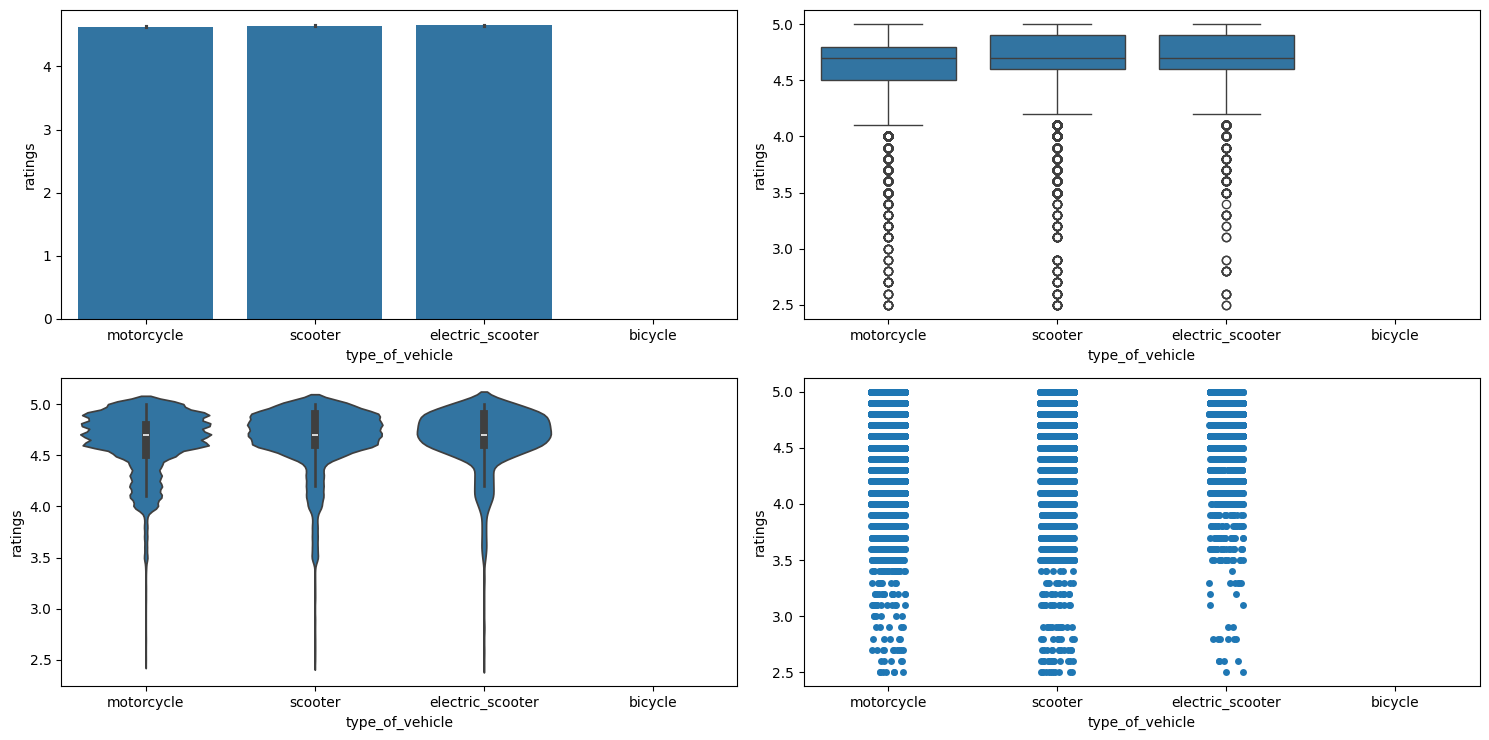

In [216]:
numerical_categorical_analysis(df_final,'ratings','type_of_vehicle')

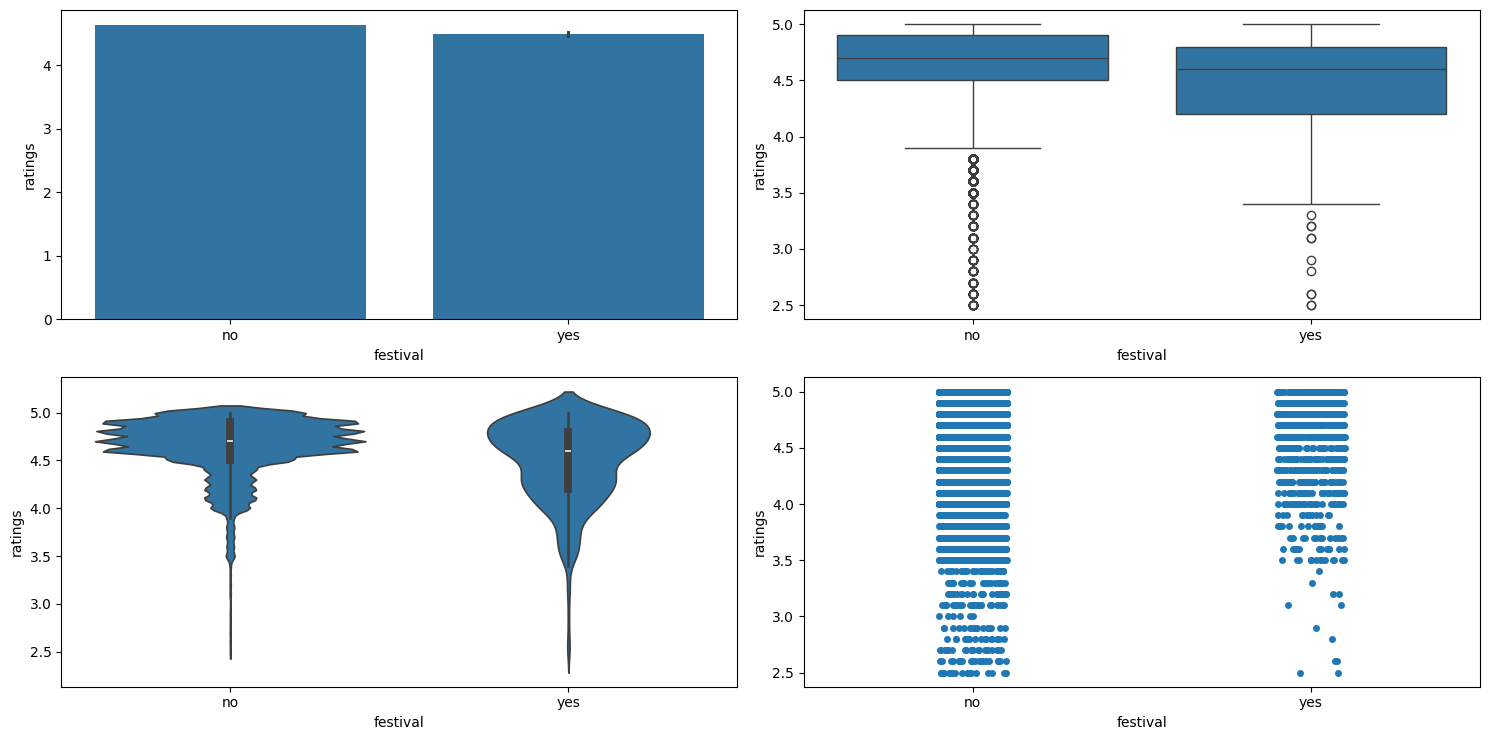

In [217]:
numerical_categorical_analysis(df_final,'ratings','festival')

# Location BAsed Features

In [218]:
location_subset=df_final.loc[:,df_final.columns[3:7].tolist()+['city_name']]
location_subset

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0                22.745049             75.892471          22.765049   
1                12.913041             77.683237          13.043041   
2                12.914264             77.678400          12.924264   
3                11.003669             76.976494          11.053669   
4                12.972793             80.249982          13.012793   
...                    ...                   ...                ...   
45497            26.902328             75.794257          26.912328   
45498                  NaN                   NaN                NaN   
45499            13.022394             80.242439          13.052394   
45500            11.001753             76.986241          11.041753   
45501            23.351058             85.325731          23.431058   

       delivery_longitude city_name  
0               75.912471      INDO  
1               77.813237      BANG  
2               77.688400      BANG  
3               77.026494     COIMB  
4               80.289982      CHEN  
...                   ...       ...  
45497           75.804257       JAP  
45498                 NaN       AGR  
45499           80.272439      CHEN  
45500           77.026241     COIMB  
45501           85.405731    RANCHI  

[45502 rows x 5 columns]

In [219]:
location_subset.isna().sum().rename('missing_count')

restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
city_name                  0
Name: missing_count, dtype: int64

In [220]:
location_subset=location_subset.dropna(axis=0)
location_subset.isna().sum().rename('missing_count')

restaurant_latitude     0
restaurant_longitude    0
delivery_latitude       0
delivery_longitude      0
city_name               0
Name: missing_count, dtype: int64

In [221]:
# Plot deliveries on map

delivery_df=pd.DataFrame({
    'latitude':location_subset['delivery_latitude'],
    'longitude':location_subset['delivery_longitude'],
    'city_name':location_subset['city_name'],
})

# Create a map using Plotly's Scatter_mapbox

fig=px.scatter_mapbox(
    delivery_df,
    lat='latitude',
    lon='longitude',
    title='Delivery Points',
    hover_name='city_name'
)

# Updating the Layout for the map of India

fig.update_layout(
    mapbox_style='open-street-map',
    mapbox_center={'lat':20.5937,'lon':78.9629}, # centred over India
    mapbox_zoom=3
)

fig.show()


# Order_Date

In [222]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'order_time_hour',
       'order_time_of_day', 'pickup_time', 'distance', 'time_taken_pt'],
      dtype='object')

In [223]:
order_date_subset=df_final.loc[:,df_final.columns[[7,18,19,20,21,14]].tolist()]

In [224]:
order_date_subset

order_date  order_day  order_month order_day_of_week  is_weekend  \
0      2022-03-19         19            3          saturday           1   
1      2022-03-25         25            3            friday           0   
2      2022-03-19         19            3          saturday           1   
3      2022-04-05          5            4           tuesday           0   
4      2022-03-26         26            3          saturday           1   
...           ...        ...          ...               ...         ...   
45497  2022-03-24         24            3          thursday           0   
45498  2022-02-16         16            2         wednesday           0   
45499  2022-03-11         11            3            friday           0   
45500  2022-03-07          7            3            monday           0   
45501  2022-03-02          2            3         wednesday           0   

      festival  
0           no  
1           no  
2           no  
3           no  
4           no  
...        ...  
45497       no  
45498       no  
45499       no  
45500       no  
45501       no  

[45502 rows x 6 columns]

In [225]:
order_date_subset['order_month'].unique()

array([3, 4, 2])

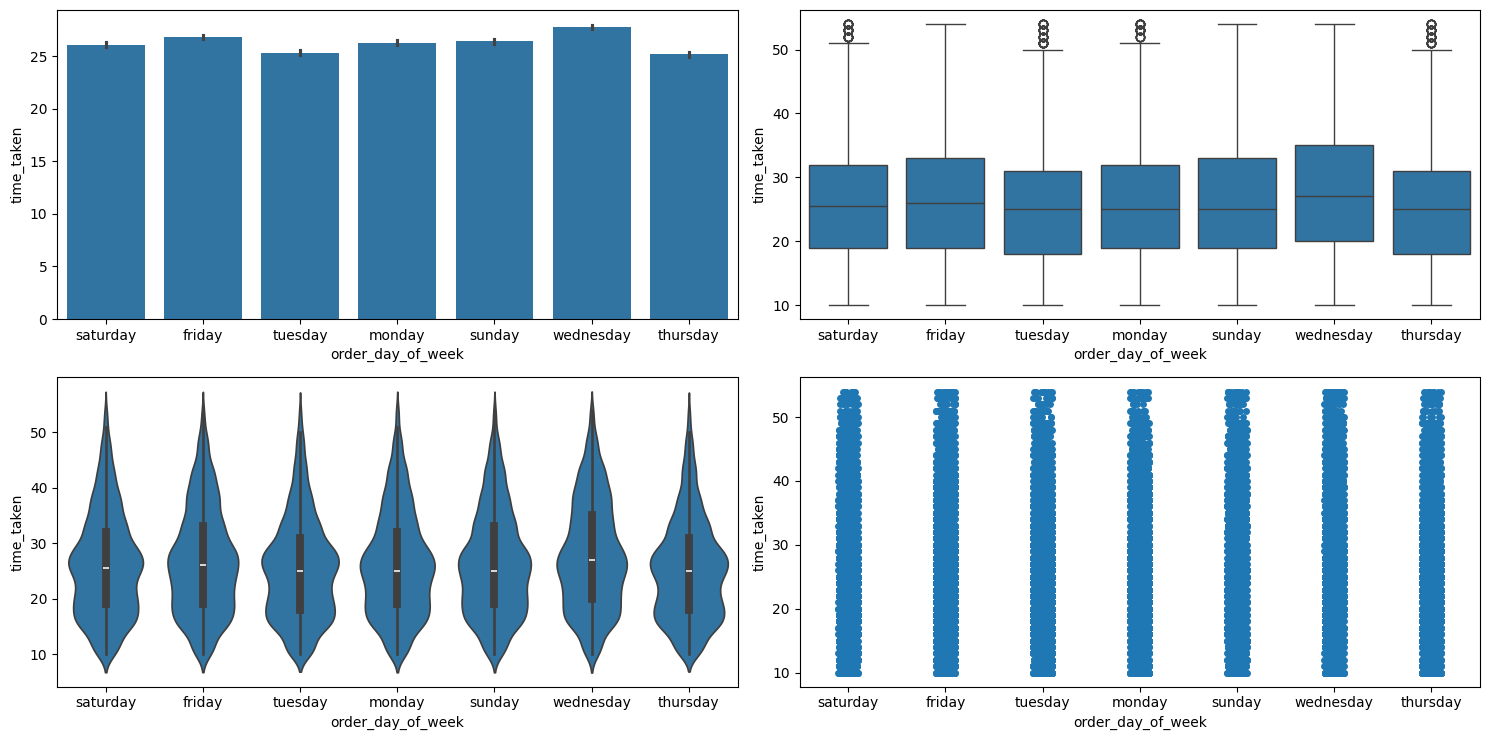

In [226]:
# analysis between day_of_week and target

numerical_categorical_analysis(df_final,'time_taken','order_day_of_week')

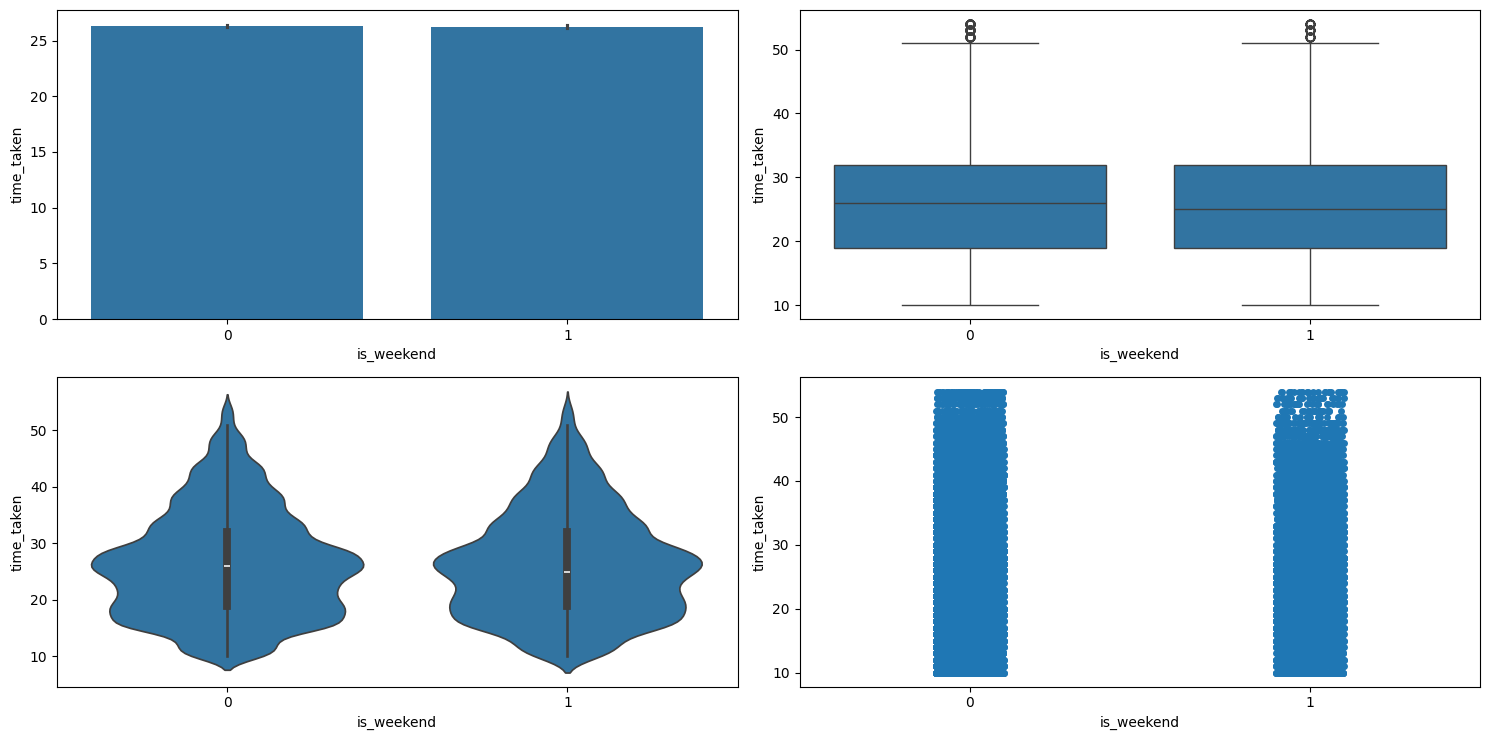

In [227]:
# does having a weekend affects target/time_taken

numerical_categorical_analysis(df_final,'time_taken','is_weekend')

In [228]:
# do weekend have an impact on traffic

chi_2_test(df_final,'is_weekend','traffic')

0.6845961396354259
Fail to reject the null hypothesis. There is no significant association between is_weekend and traffic.


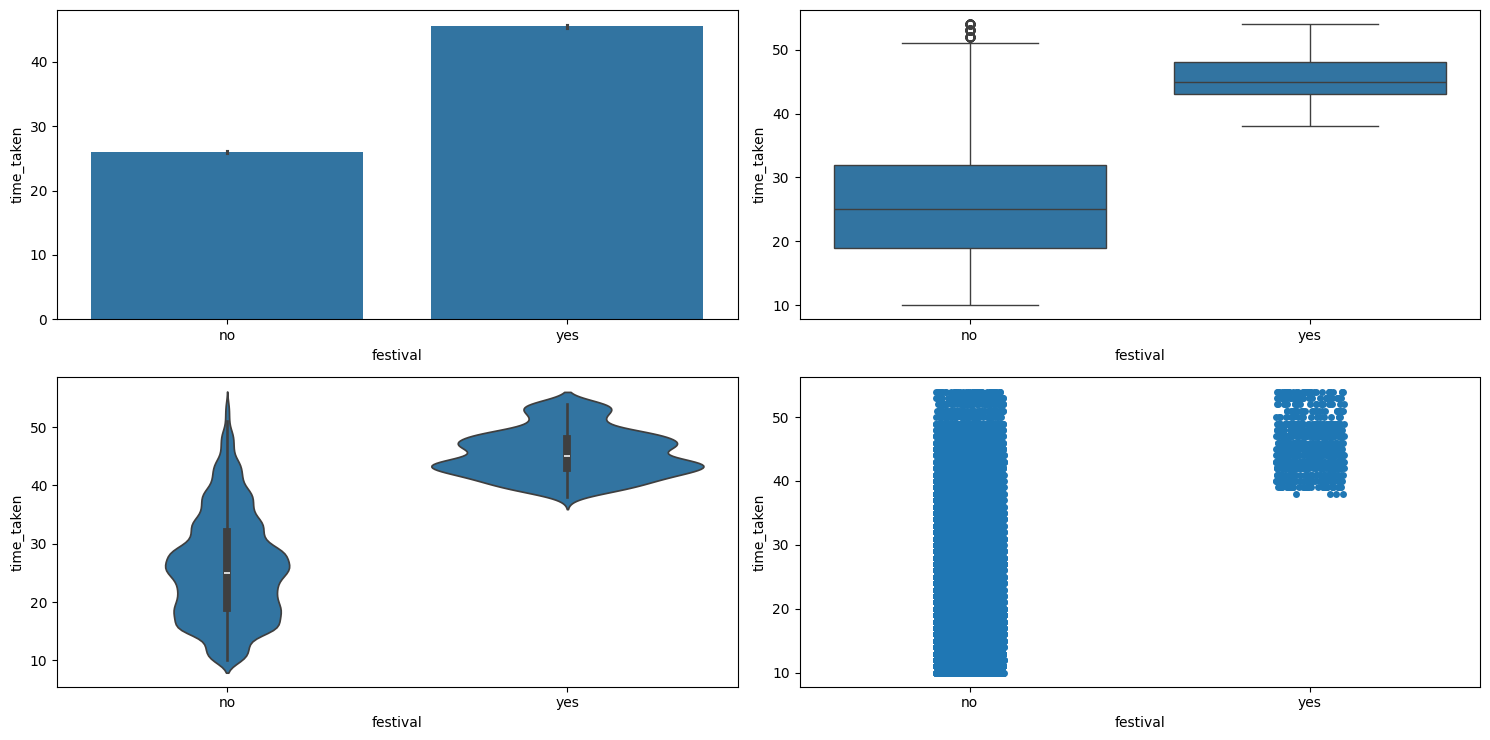

In [229]:
# festival and target analyses

numerical_categorical_analysis(df_final,'time_taken','festival')

**Observations:**



*   The average time it takes for delivery varies when there is a Festival
*   The range of delievry time is shorter when there is a festival with lesser variation which mean on a festival delivery time usally takes longer



In [230]:
# do festival affects traffic

chi_2_test(df_final,'festival','traffic')

1.1223471129146869e-153
Reject the null hypothesis. There is a significant association between festival and traffic.


In [231]:
df_final.pivot_table(index='traffic',columns='festival',values='time_taken',aggfunc='mean')

festival         no        yes
traffic                       
high      27.010373  45.826087
jam       30.538039  46.093651
low       21.284332  42.020000
medium    26.550288  43.715385

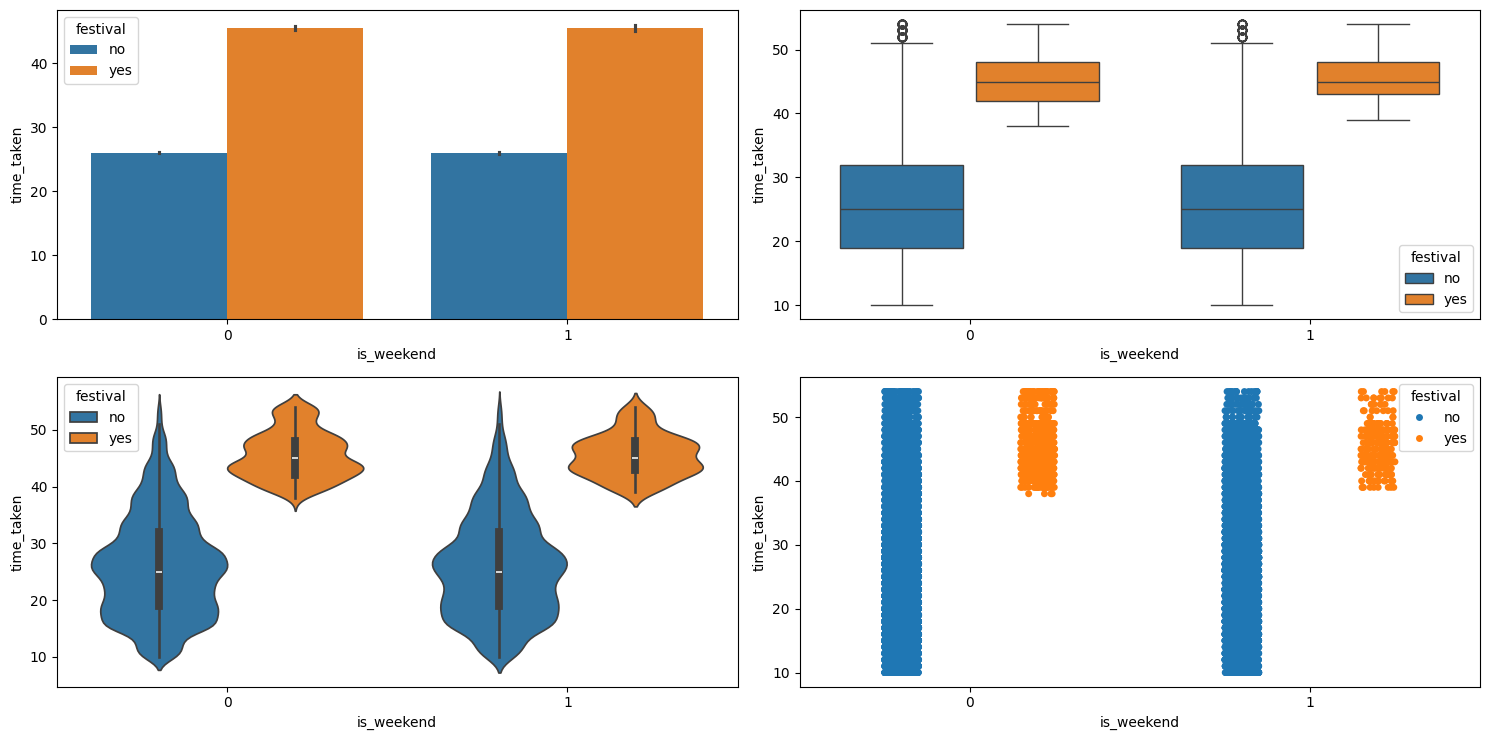

In [232]:
multivariate_analysis(df_final,'time_taken','is_weekend','festival')

# Time_related Columns

In [233]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'order_time_hour',
       'order_time_of_day', 'pickup_time', 'distance', 'time_taken_pt'],
      dtype='object')

In [234]:
time_subset=df_final.loc[:,df_final.columns[22:25].tolist()]
time_subset

order_time_hour order_time_of_day  pickup_time
0                 11.0           morning         15.0
1                 19.0           evening          5.0
2                  8.0           morning         15.0
3                 18.0           evening         10.0
4                 13.0         afternoon         15.0
...                ...               ...          ...
45497             11.0           morning         10.0
45498             19.0           evening         15.0
45499             23.0             night         15.0
45500             13.0         afternoon          5.0
45501             17.0           evening          5.0

[45502 rows x 3 columns]

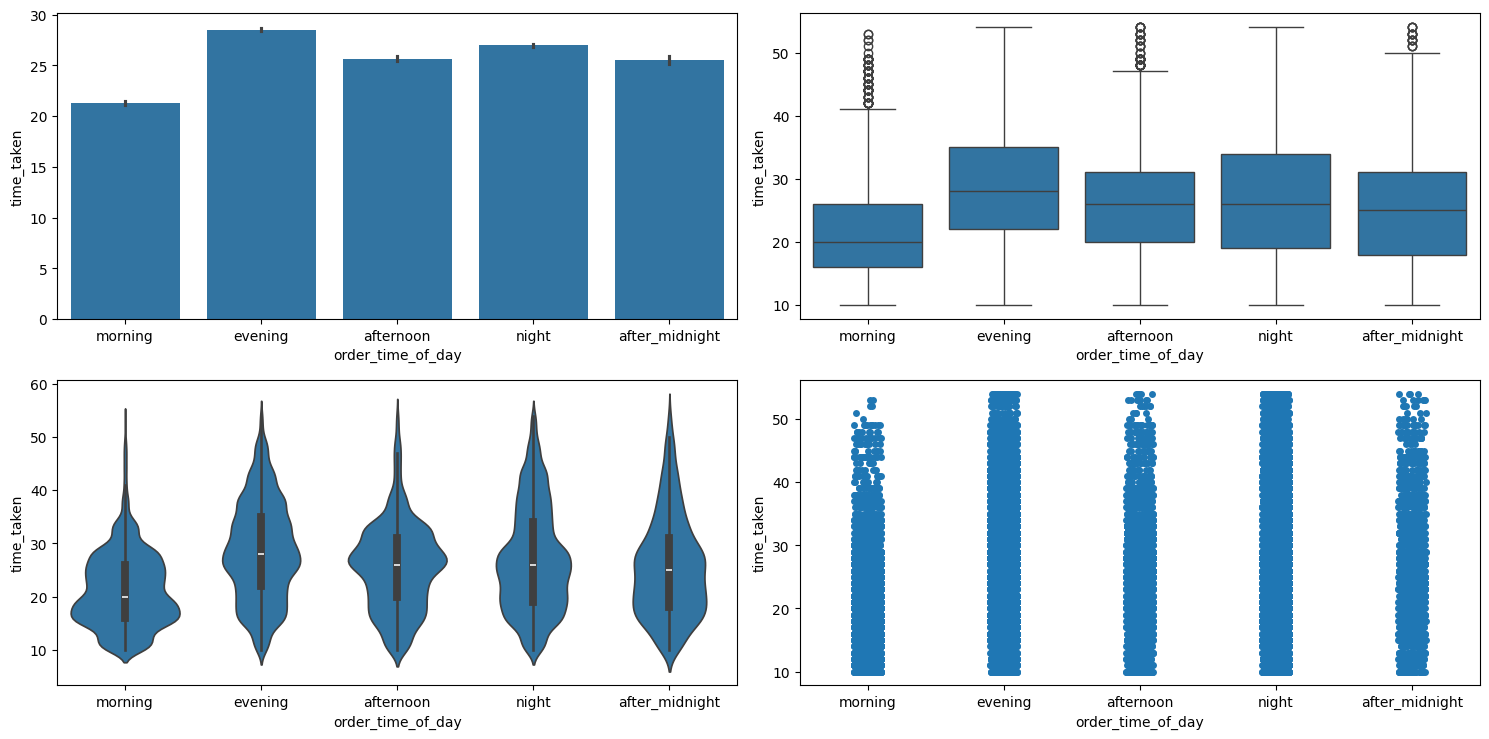

In [235]:
numerical_categorical_analysis(df_final,'time_taken','order_time_of_day')

In [236]:
anova_test(df_final,'time_taken','order_time_of_day')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and order_time_of_day.


In [237]:
time_subset['order_time_hour'].value_counts().head(5)

order_time_hour
21.0    4686
19.0    4595
22.0    4576
20.0    4539
23.0    4511
Name: count, dtype: int64

count percentage
order_time_hour                  
21.0              4686      10.3%
19.0              4595      10.1%
22.0              4576     10.06%
20.0              4539      9.98%
23.0              4511      9.91%
18.0              4480      9.85%
17.0              4278       9.4%
10.0              1991      4.38%
11.0              1962      4.31%
9.0               1947      4.28%
8.0               1818       4.0%
12.0               892      1.96%
15.0               873      1.92%
14.0               791      1.74%
13.0               784      1.72%
16.0               709      1.56%
0.0                430      0.95%

**************************************************
There are 18 unique categories in the order_time_hour column
**************************************************
The unique categories are [11. 19.  8. 18. 13. 21. 17. 20. 14.  9. 22. 12. 23. nan 10. 16. 15.  0.]


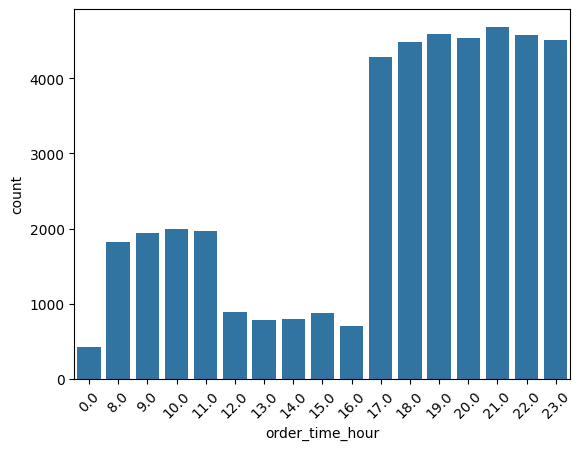

In [238]:
categorical_anaylyses(df_final,'order_time_hour')

count percentage
order_time_of_day                  
night              18312     40.24%
evening            13353     29.35%
morning             7718     16.96%
afternoon           4049       8.9%
after_midnight      2070      4.55%

**************************************************
There are 5 unique categories in the order_time_of_day column
**************************************************
The unique categories are ['morning' 'evening' 'afternoon' 'night' 'after_midnight']


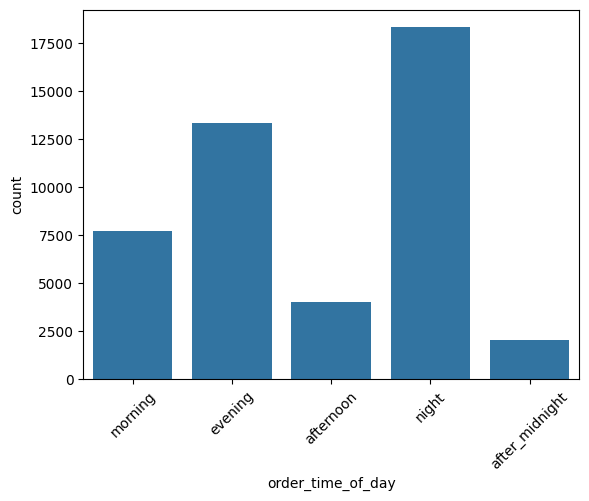

In [239]:
categorical_anaylyses(df_final,'order_time_of_day')

# Pick_up Time

In [240]:
df_final['pickup_time']

0        15.0
1         5.0
2        15.0
3        10.0
4        15.0
         ... 
45497    10.0
45498    15.0
45499    15.0
45500     5.0
45501     5.0
Name: pickup_time, Length: 45502, dtype: float64

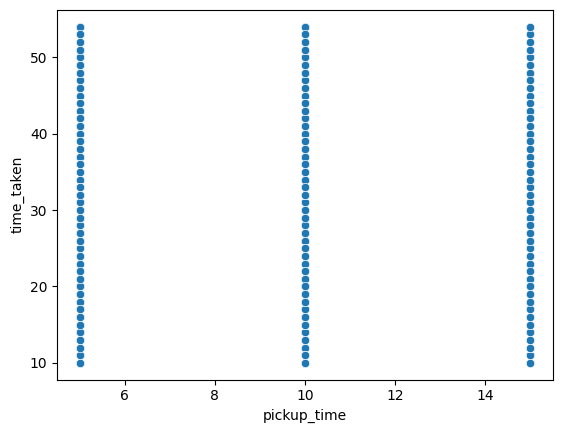

In [241]:
sns.scatterplot(df_final,x='pickup_time',y='time_taken')
plt.show()

**Observation:**



*   There are discrete values on pick_up time column, this means that my pick_up time columns can be treated as an categorical column



count percentage
pickup_time                  
5.0          14703     32.31%
15.0         14610     32.11%
10.0         14549     31.97%

**************************************************
There are 4 unique categories in the pickup_time column
**************************************************
The unique categories are [15.  5. 10. nan]


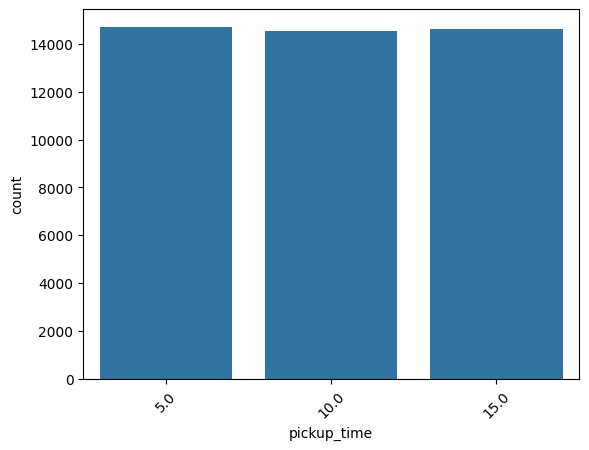

In [242]:
categorical_anaylyses(df_final,'pickup_time')

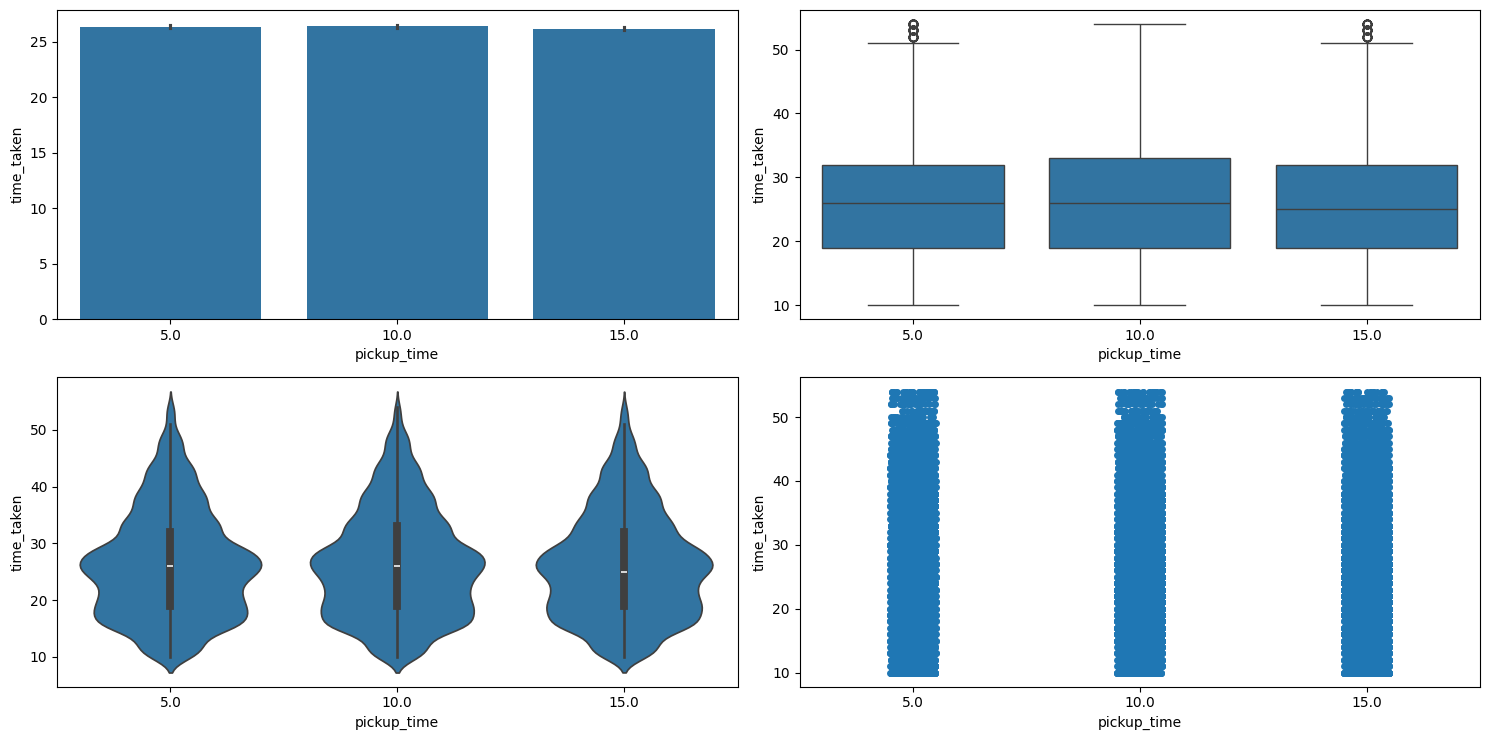

In [243]:
numerical_categorical_analysis(df_final,'time_taken','pickup_time')

In [244]:
anova_test(df_final,'time_taken','pickup_time')

0.09932647028954891
Fail to reject the null hypothesis. There is no significant relationship between time_taken and pickup_time.


# Traffic

count percentage
traffic                  
low      15477     34.01%
jam      14143     31.08%
medium   10947     24.06%
high      4425      9.72%

**************************************************
There are 5 unique categories in the traffic column
**************************************************
The unique categories are ['high' 'jam' 'low' 'medium' nan]


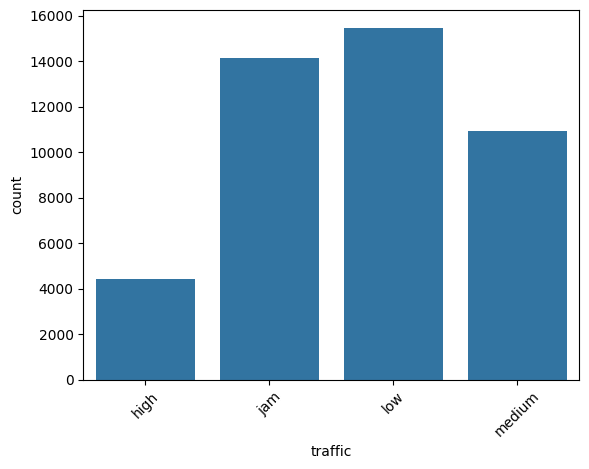

In [245]:
categorical_anaylyses(df_final,'traffic')

In [246]:
# does depends on city_type

chi_2_test(df_final,'city_type','traffic')

2.3390790568495405e-104
Reject the null hypothesis. There is a significant association between city_type and traffic.


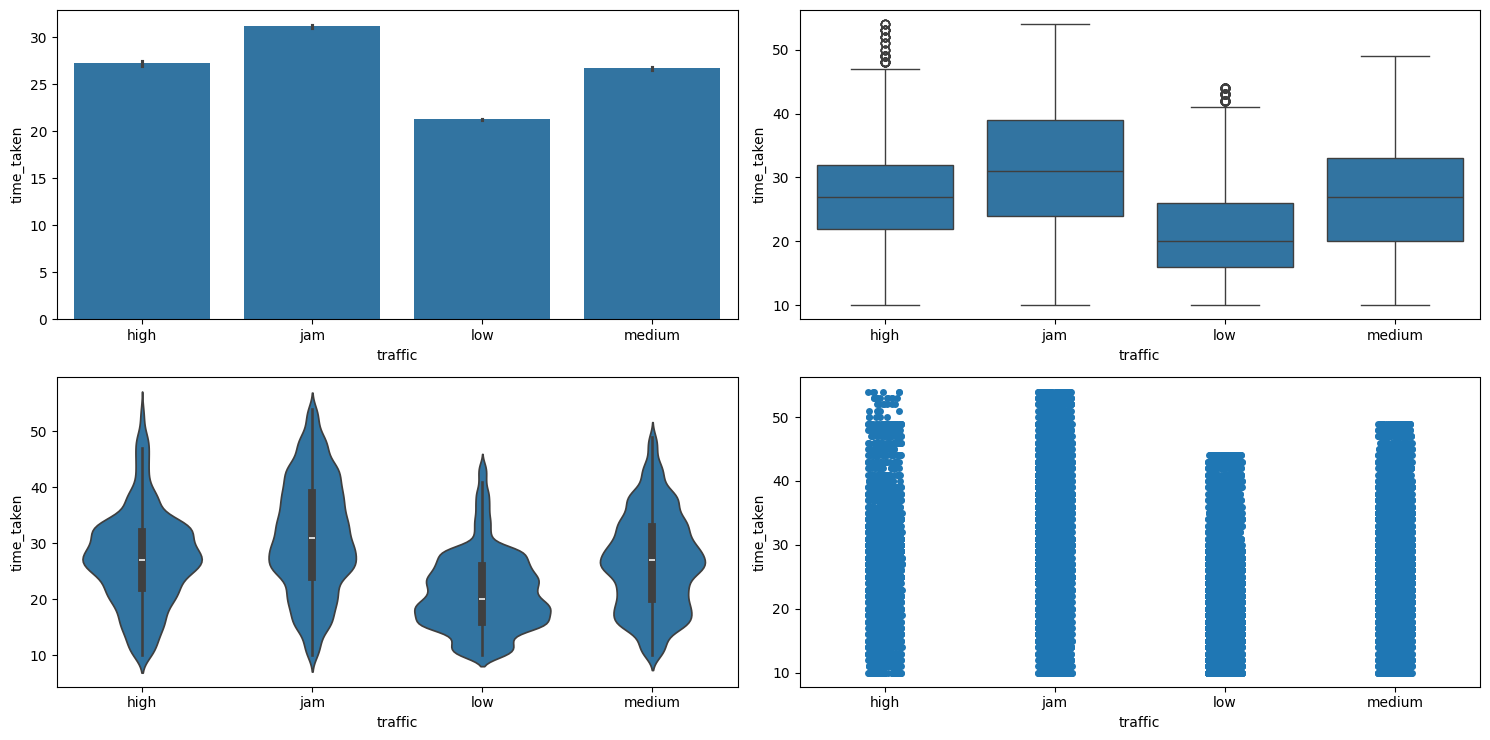

In [247]:
numerical_categorical_analysis(df_final,'time_taken','traffic')

In [248]:
anova_test(df_final,'time_taken','traffic')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and traffic.


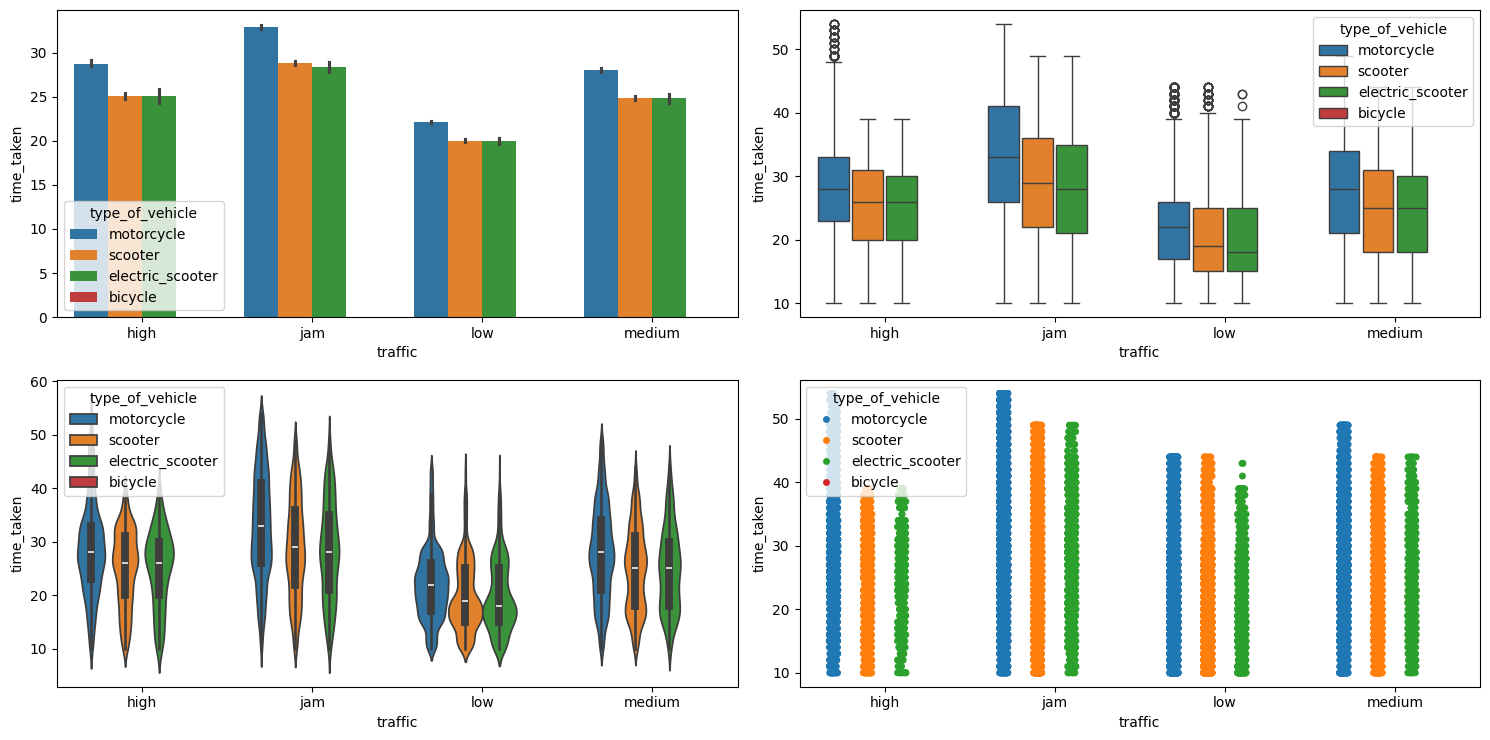

In [249]:
multivariate_analysis(df_final,'time_taken','traffic','type_of_vehicle')

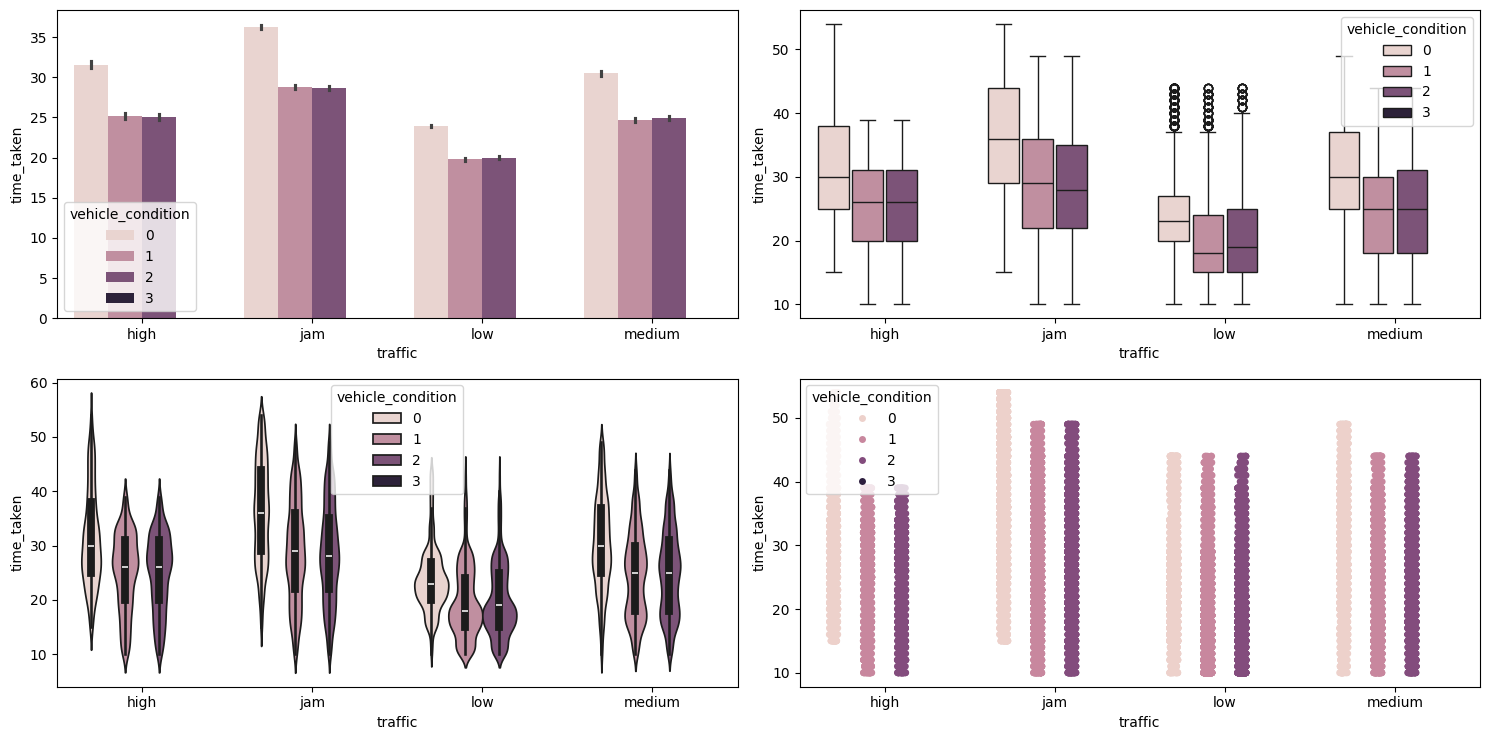

In [250]:
multivariate_analysis(df_final,'time_taken','traffic','vehicle_condition')

**Dont make wrong interpretation that good condition vehicle take longer times on average.**

This simply means that good vehicle are preffered for deliveries during festivals which results in longer delievery times.


In [251]:
df_final.loc[df_final['festival']=='yes']['vehicle_condition'].value_counts()

vehicle_condition
0    589
2    160
1    132
3     13
Name: count, dtype: int64

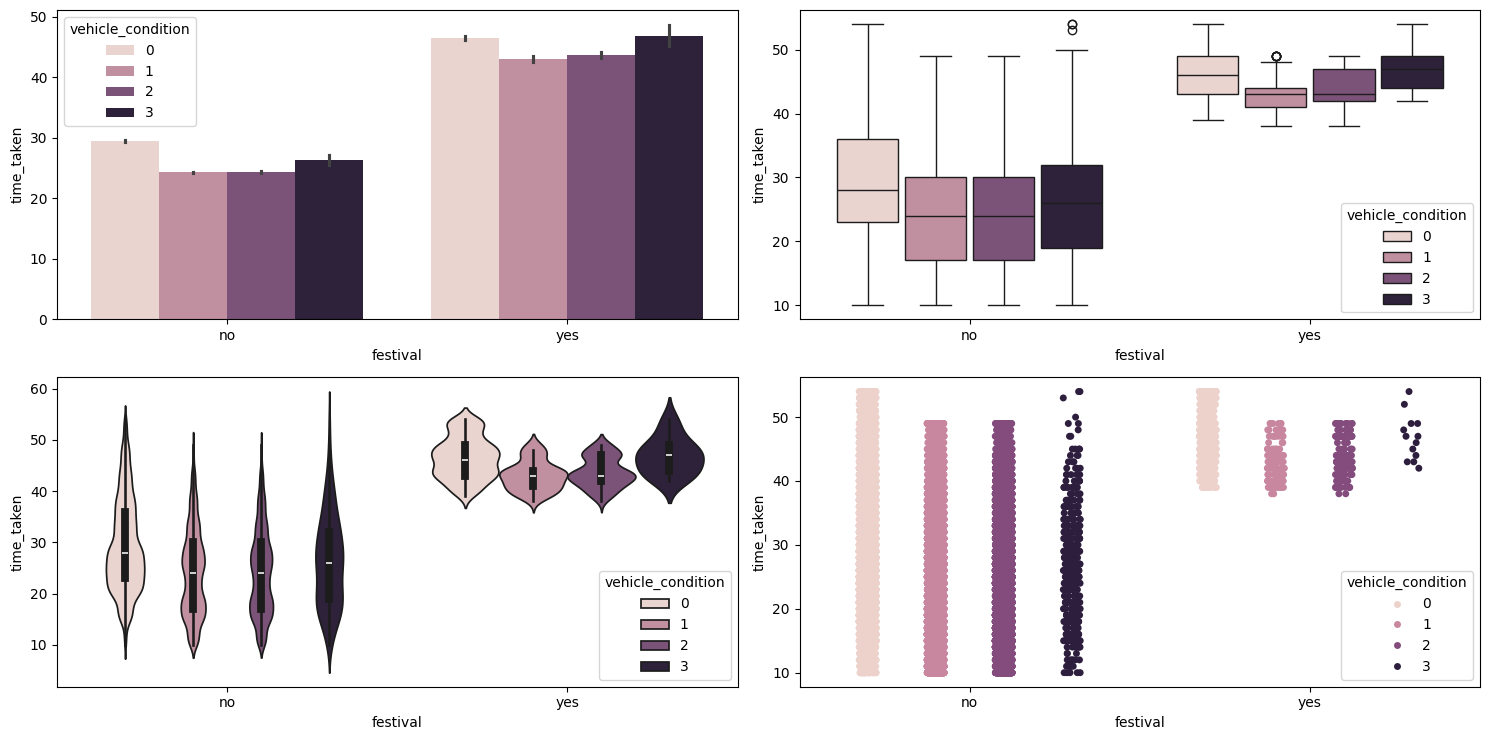

In [252]:
multivariate_analysis(df_final,'time_taken','festival','vehicle_condition')

# Multiple_deliveries

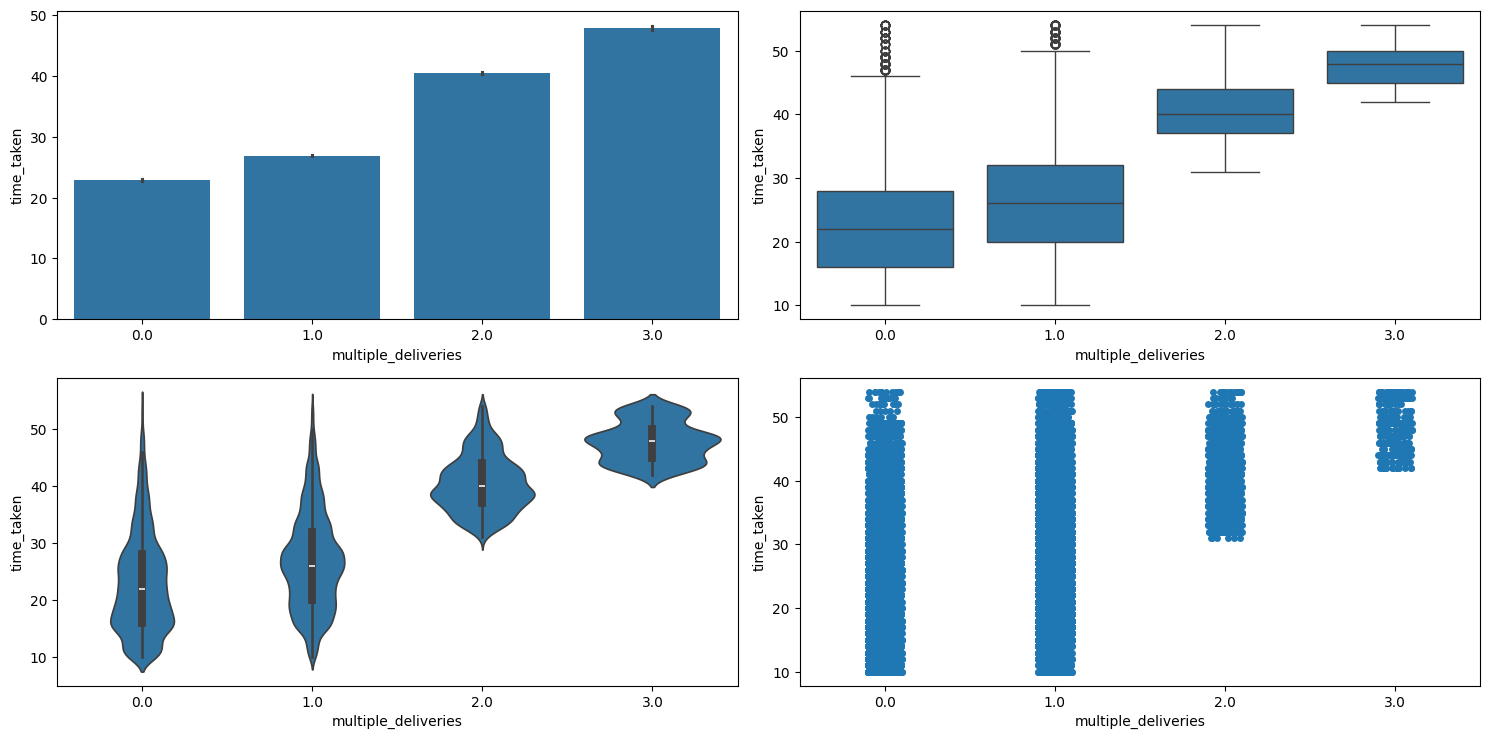

In [253]:
numerical_categorical_analysis(df_final,'time_taken','multiple_deliveries')

In [254]:
anova_test(df_final,'time_taken','multiple_deliveries')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and multiple_deliveries.


# Weather

count percentage
weather                     
fog          7654     16.82%
stormy       7586     16.67%
cloudy       7536     16.56%
sandstorms   7495     16.47%
windy        7422     16.31%
sunny        7284     16.01%

**************************************************
There are 7 unique categories in the weather column
**************************************************
The unique categories are ['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy' nan]


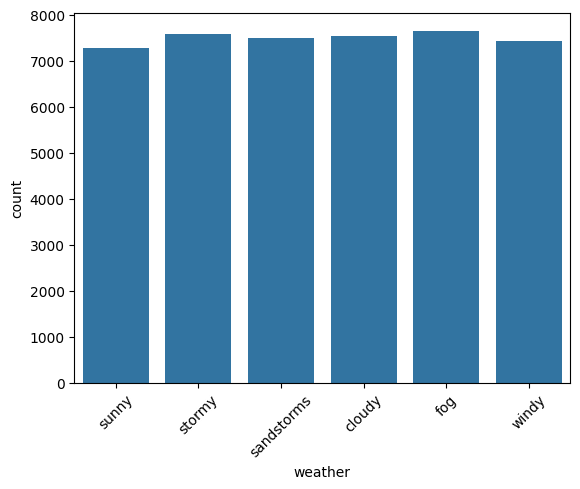

In [255]:
categorical_anaylyses(df_final,'weather')

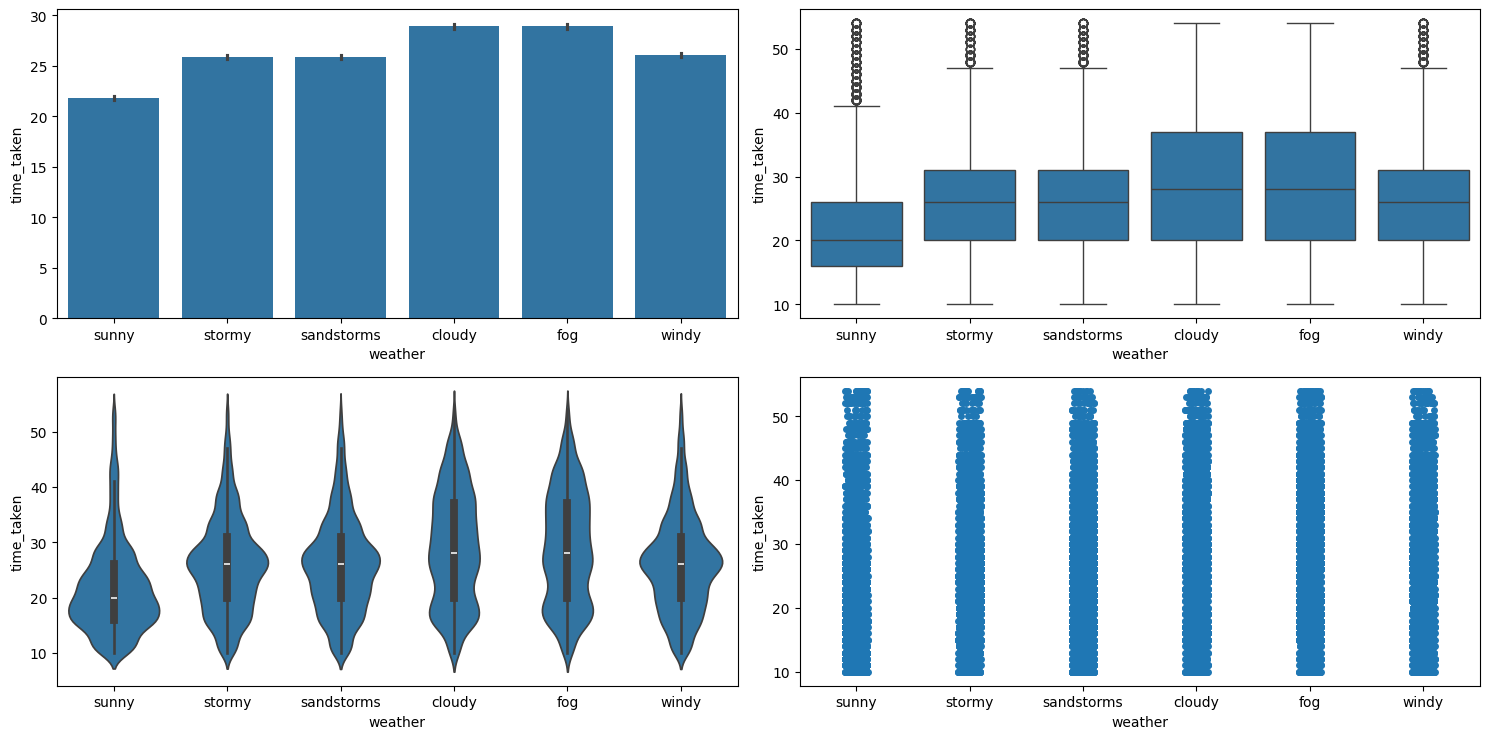

In [256]:
numerical_categorical_analysis(df_final,'time_taken','weather')

In [257]:
anova_test(df_final,'time_taken','weather')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and weather.


In [258]:
# does Weather affects Traffic

chi_2_test(df_final,'weather','traffic')

0.4796388074753828
Fail to reject the null hypothesis. There is no significant association between weather and traffic.


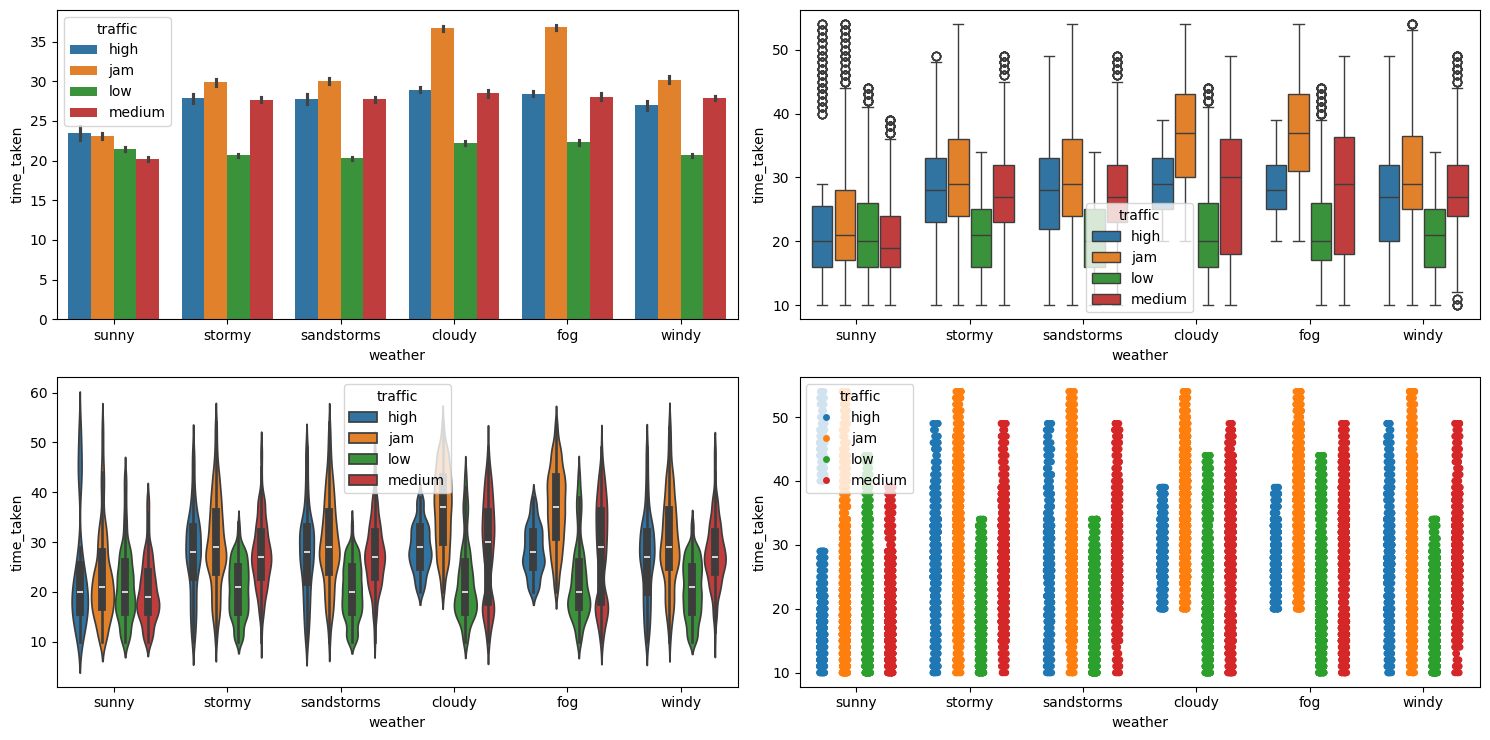

In [259]:
multivariate_analysis(df_final,'time_taken','weather','traffic')

It seems that traffic when compared to weather is more domibating feature

In [260]:
df_final.pivot_table(index='weather',columns='traffic',values='time_taken',aggfunc='mean')

traffic          high        jam        low     medium
weather                                               
cloudy      28.940860  36.689655  22.208445  28.483134
fog         28.426546  36.806916  22.303427  28.044816
sandstorms  27.711840  30.018758  20.297049  27.738522
stormy      27.845839  29.850194  20.681734  27.680502
sunny       23.448980  23.082132  21.449293  20.195518
windy       26.972789  30.219056  20.665862  27.888769

# Vehicle_Condition and Type

count percentage
vehicle_condition                  
2                  15034     33.04%
1                  15030     33.03%
0                  15009     32.99%
3                    429      0.94%

**************************************************
There are 4 unique categories in the vehicle_condition column
**************************************************
The unique categories are [2 0 1 3]


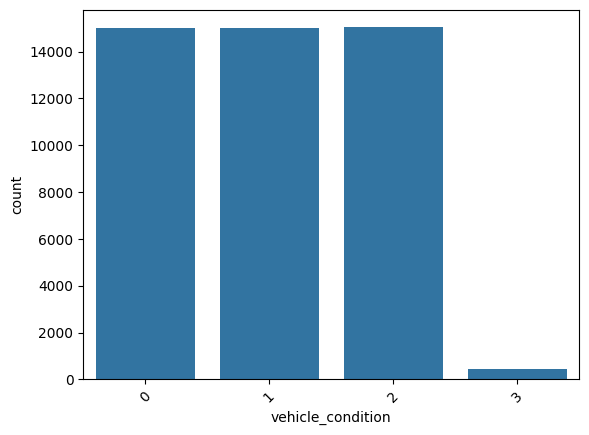

In [261]:
categorical_anaylyses(df_final,'vehicle_condition')

count percentage
type_of_vehicle                   
motorcycle        26427     58.08%
scooter           15244      33.5%
electric_scooter   3778       8.3%
bicycle              53      0.12%

**************************************************
There are 4 unique categories in the type_of_vehicle column
**************************************************
The unique categories are ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']


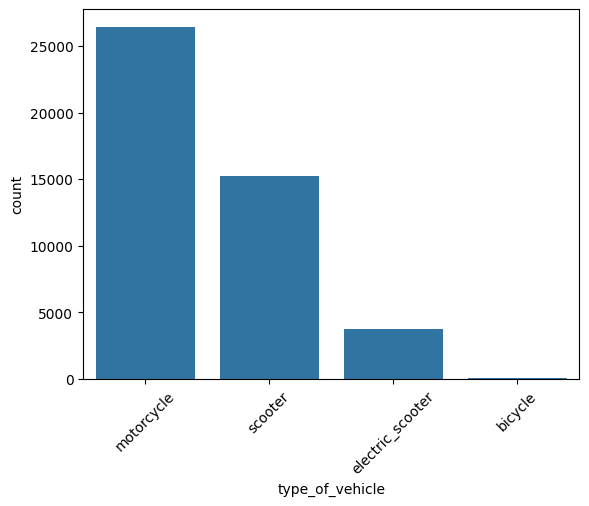

In [262]:
categorical_anaylyses(df_final,'type_of_vehicle')

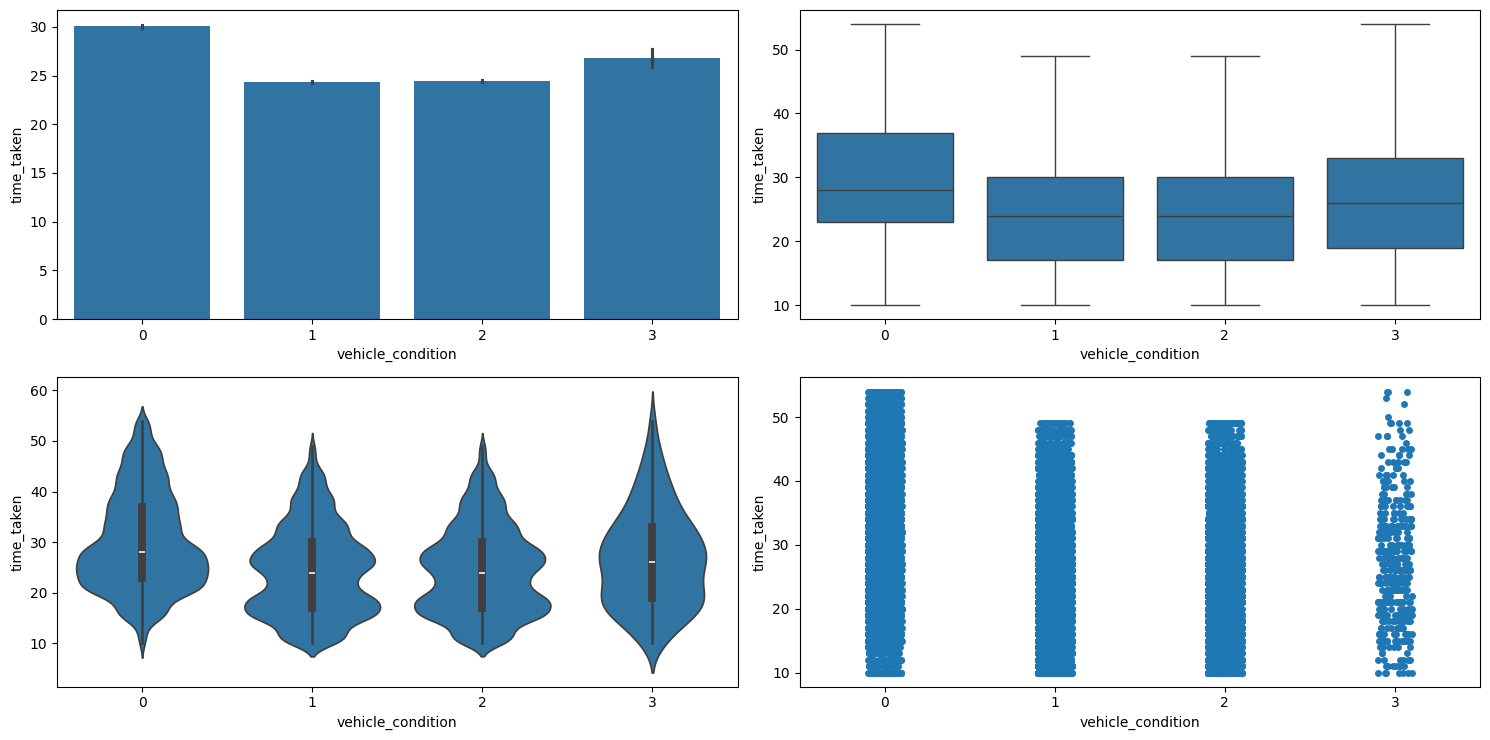

In [263]:
numerical_categorical_analysis(df_final,'time_taken','vehicle_condition')

In [264]:
anova_test(df_final,'time_taken','vehicle_condition')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and vehicle_condition.


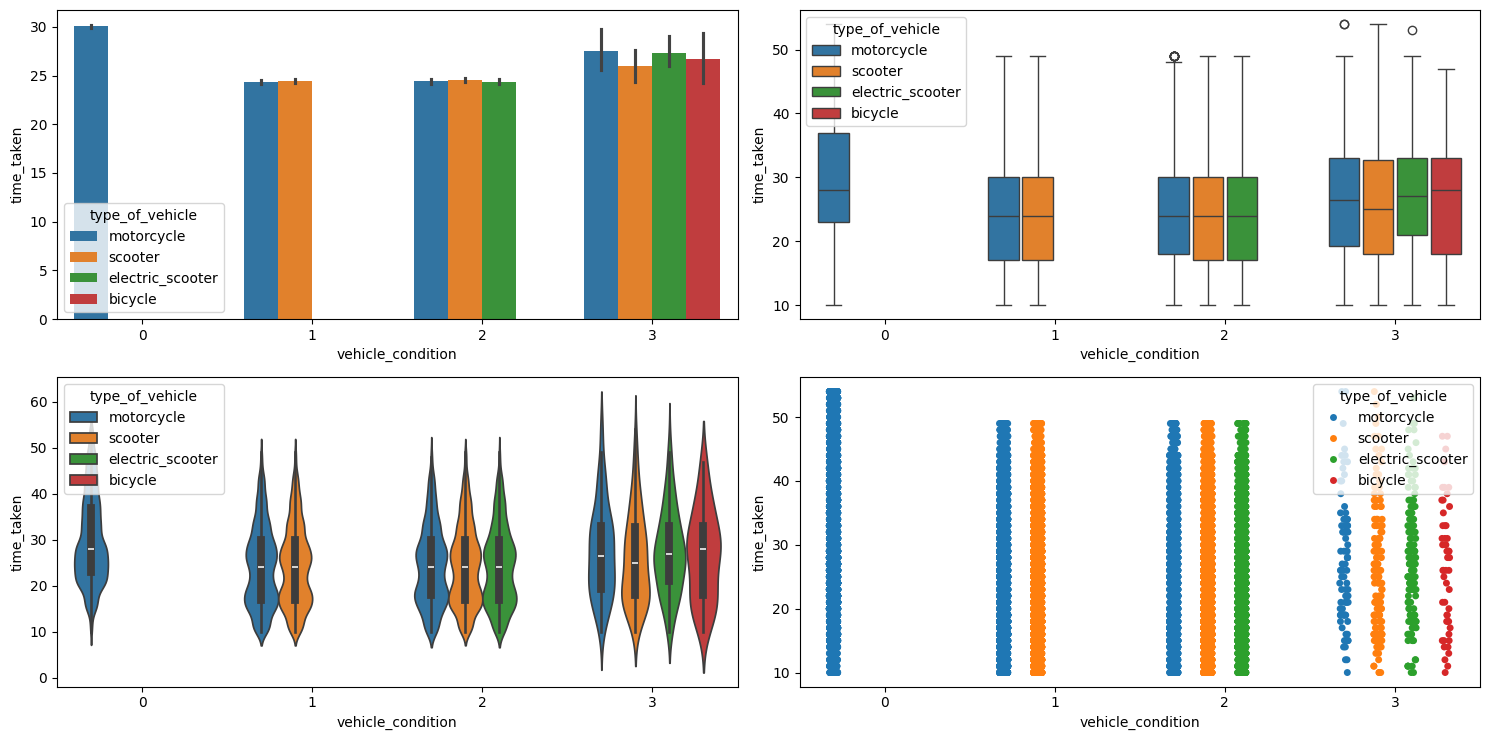

In [265]:
multivariate_analysis(df_final,'time_taken','vehicle_condition','type_of_vehicle')

In [266]:
chi_2_test(df_final,'vehicle_condition','type_of_vehicle')

0.0
Reject the null hypothesis. There is a significant association between vehicle_condition and type_of_vehicle.


# Type of Order

count percentage
type_of_order                  
snack          11512      25.3%
meal           11435     25.13%
drinks         11294     24.82%
buffet         11261     24.75%

**************************************************
There are 4 unique categories in the type_of_order column
**************************************************
The unique categories are ['snack' 'drinks' 'buffet' 'meal']


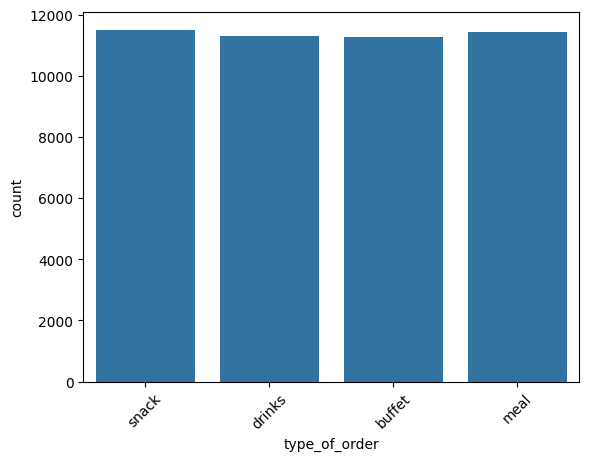

In [268]:
categorical_anaylyses(df_final,'type_of_order')

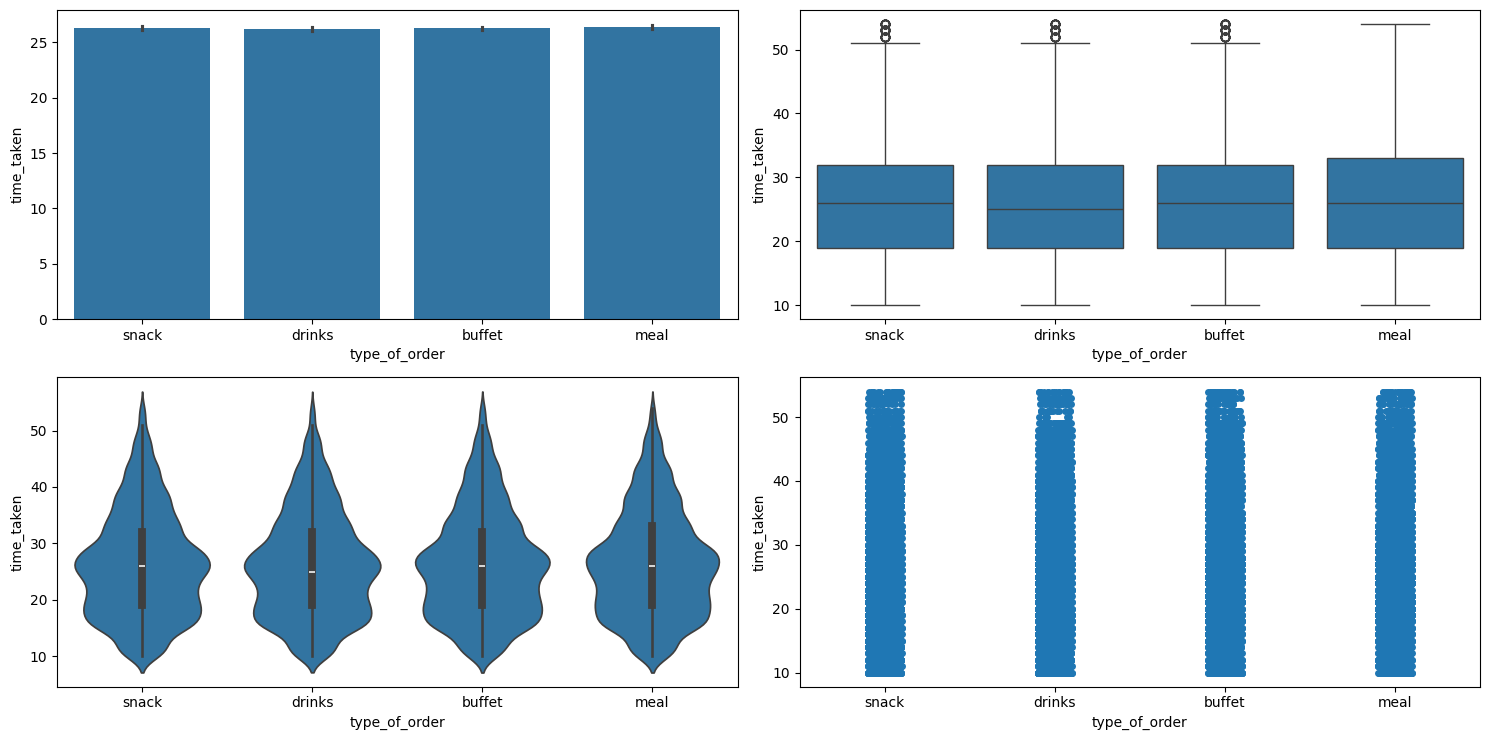

In [269]:
numerical_categorical_analysis(df_final,'time_taken','type_of_order')

In [270]:
anova_test(df_final,'time_taken','type_of_order')

0.3043309877239704
Fail to reject the null hypothesis. There is no significant relationship between time_taken and type_of_order.


In [272]:
# Contingency Table

pd.crosstab(df_final['type_of_order'],df_final['is_weekend'])

is_weekend        0     1
type_of_order            
buffet         8238  3023
drinks         8130  3164
meal           8290  3145
snack          8337  3175

In [276]:
chi_2_test(df_final,'type_of_order','pickup_time')

0.49118080317709834
Fail to reject the null hypothesis. There is no significant association between type_of_order and pickup_time.


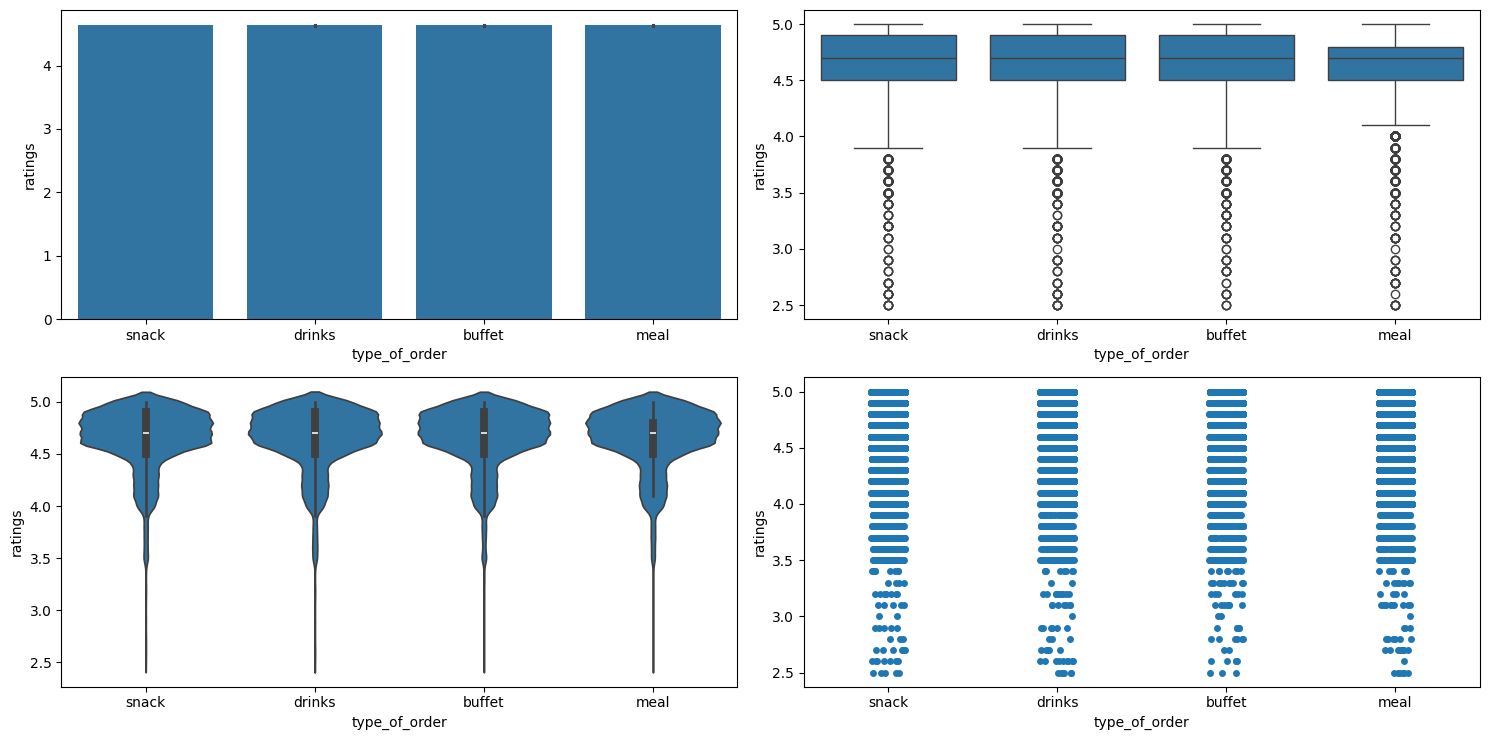

In [274]:
# does order type has an affect on Ratings

numerical_categorical_analysis(df_final,'ratings','type_of_order')

In [277]:
chi_2_test(df_final,'type_of_order','is_weekend')

0.26581615402072756
Fail to reject the null hypothesis. There is no significant association between type_of_order and is_weekend.


In [278]:
chi_2_test(df_final,'type_of_order','festival')

0.6149018072722126
Fail to reject the null hypothesis. There is no significant association between type_of_order and festival.


# City_name and Type

count percentage
city_name                  
JAP         3439      7.56%
RANCHI      3222      7.08%
BANG        3184       7.0%
SUR         3182      6.99%
HYD         3177      6.98%
MUM         3168      6.96%
MYS         3164      6.95%
COIMB       3162      6.95%
VAD         3159      6.94%
INDO        3154      6.93%
CHEN        3132      6.88%
PUNE        3129      6.88%
AGR          761      1.67%
LUDH         758      1.67%
ALH          738      1.62%
KNP          737      1.62%
DEH          735      1.62%
GOA          709      1.56%
AURG         703      1.54%
KOC          701      1.54%
KOL          699      1.54%
BHP          689      1.51%

**************************************************
There are 22 unique categories in the city_name column
**************************************************
The unique categories are ['INDO' 'BANG' 'COIMB' 'CHEN' 'HYD' 'RANCHI' 'MYS' 'DEH' 'KOC' 'PUNE'
 'LUDH' 'KNP' 'MUM' 'KOL' 'JAP' 'SUR' 'GOA' 'AURG' 'AGR' 'VAD' 'ALH' 'BHP']


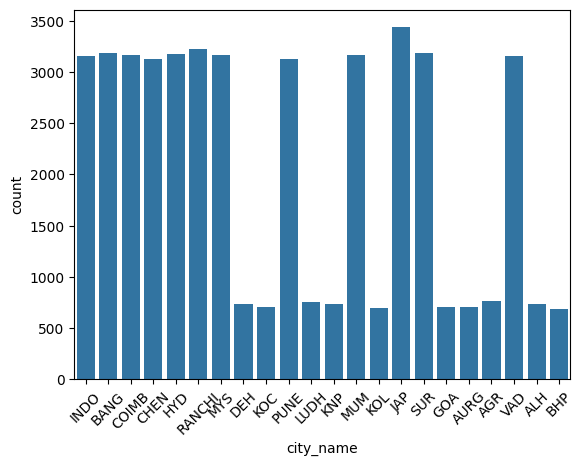

In [279]:
categorical_anaylyses(df_final,'city_name')

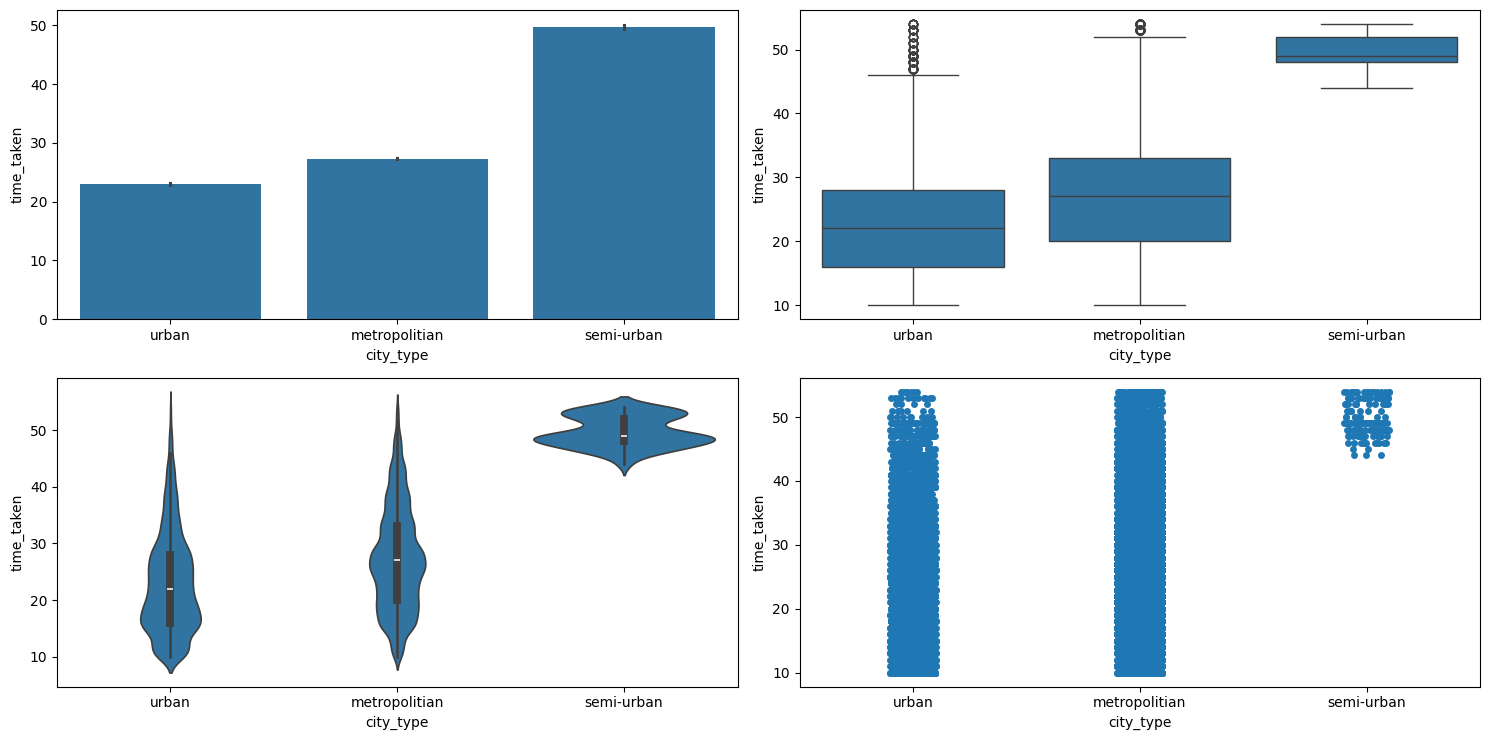

In [280]:
numerical_categorical_analysis(df_final,'time_taken','city_type')

In [281]:
anova_test(df_final,'time_taken','city_type')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and city_type.


In [282]:
numerical_categorical_analysis(df_final,'ratings','city_type')

In [283]:
anova_test(df_final,'ratings','city_type')

2.748518721658396e-43
Reject the null hypothesis. There is a significant relationship between ratings and city_type.


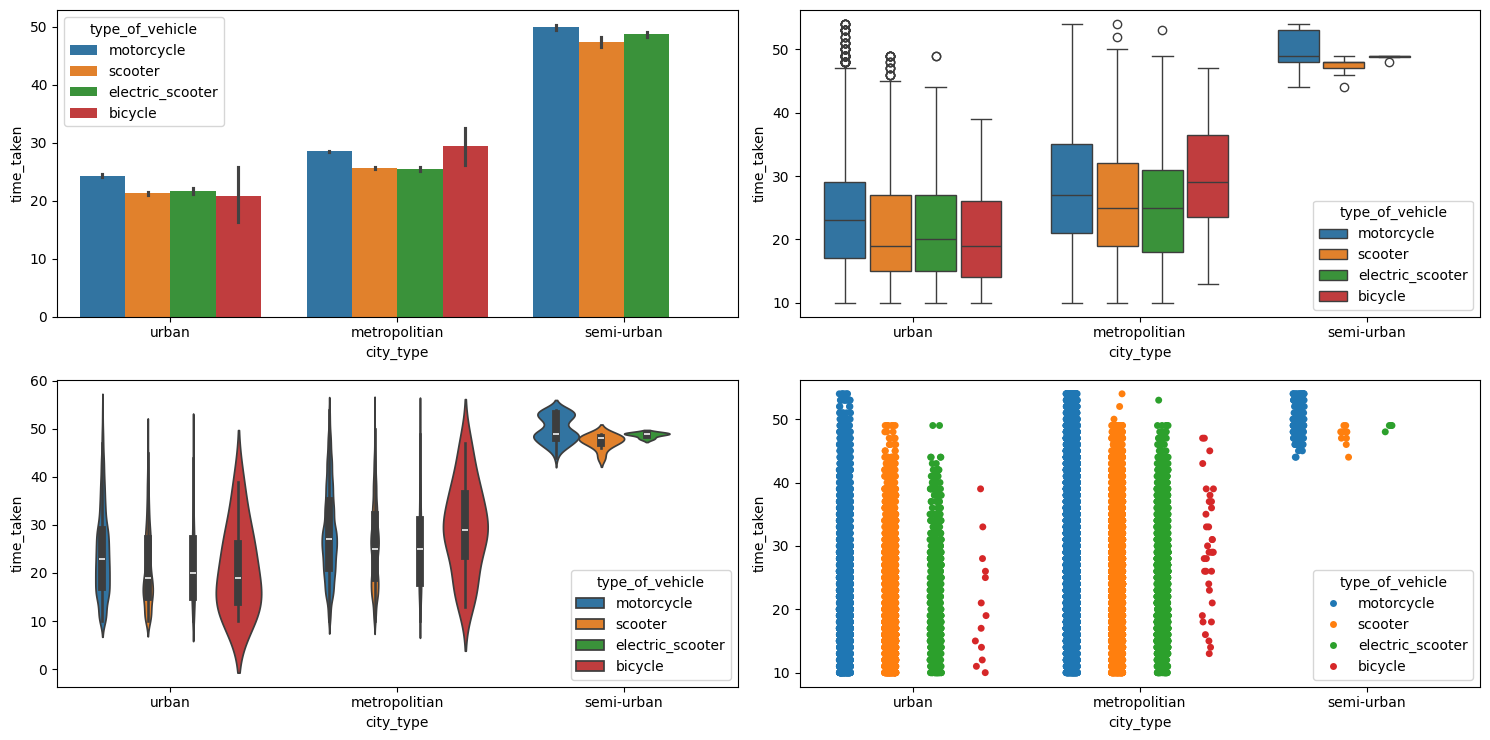

In [284]:
multivariate_analysis(df_final,'time_taken','city_type','type_of_vehicle')

# Distnace

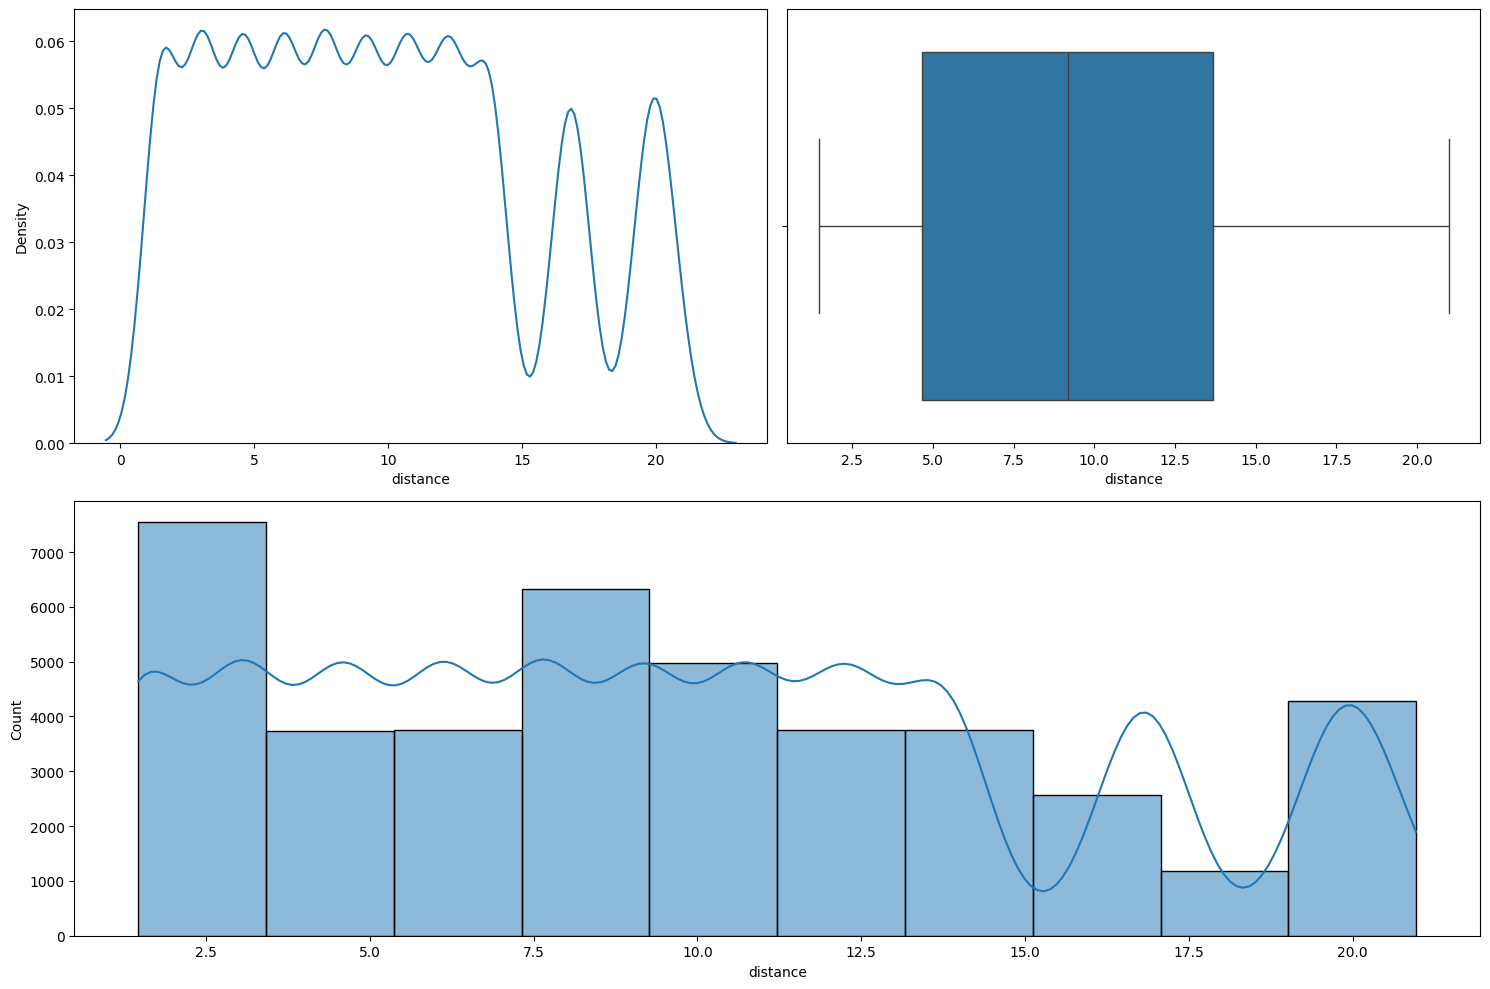

In [285]:
numerical_analyses(df_final,'distance',bins=10)

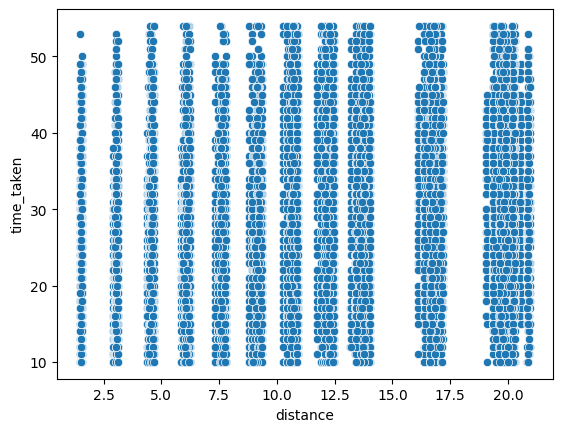

In [286]:
sns.scatterplot(df_final,x='distance',y='time_taken')
plt.show()

In [287]:
# does distnace have an impact on the type of Vehicle or condition

numerical_categorical_analysis(df_final,'distance','vehicle_condition')

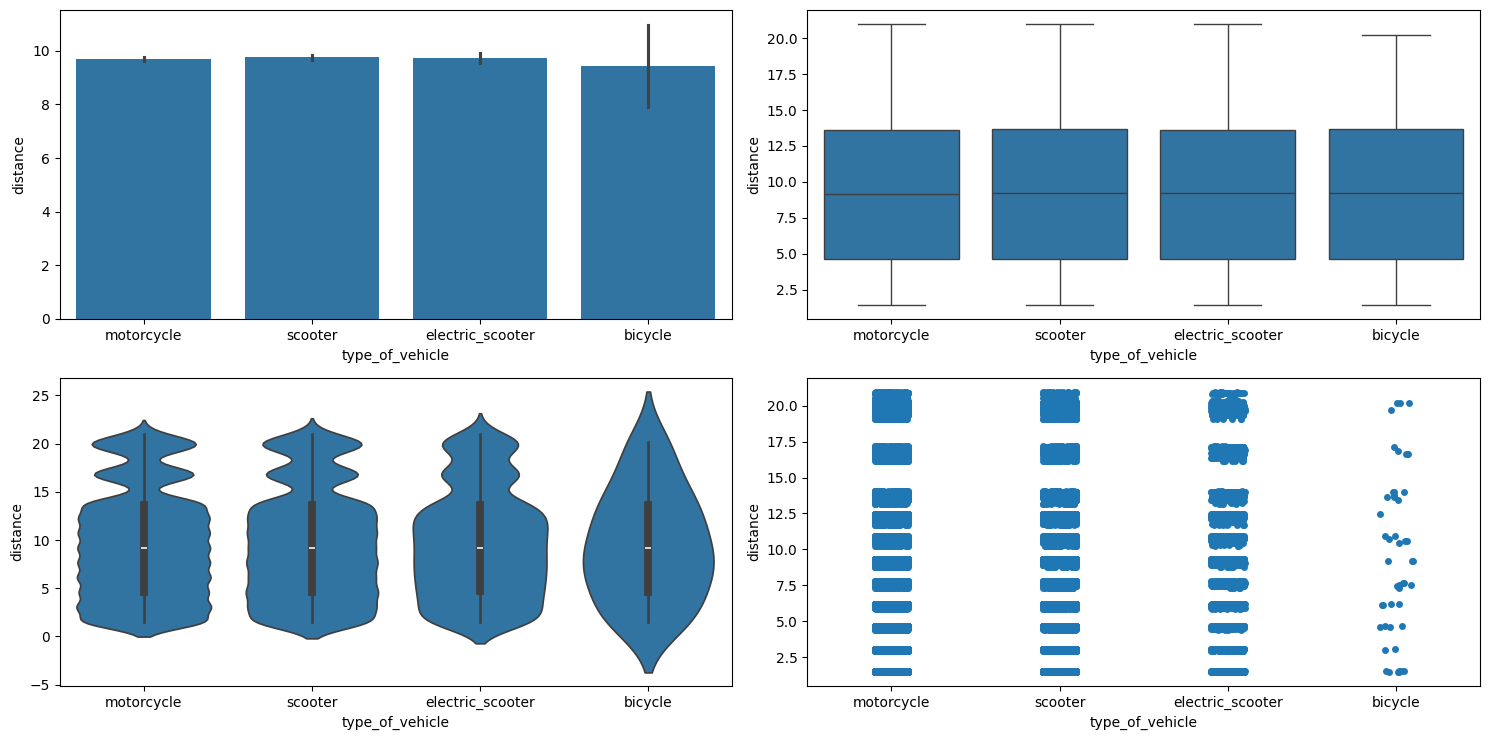

In [288]:
numerical_categorical_analysis(df_final,'distance','type_of_vehicle')

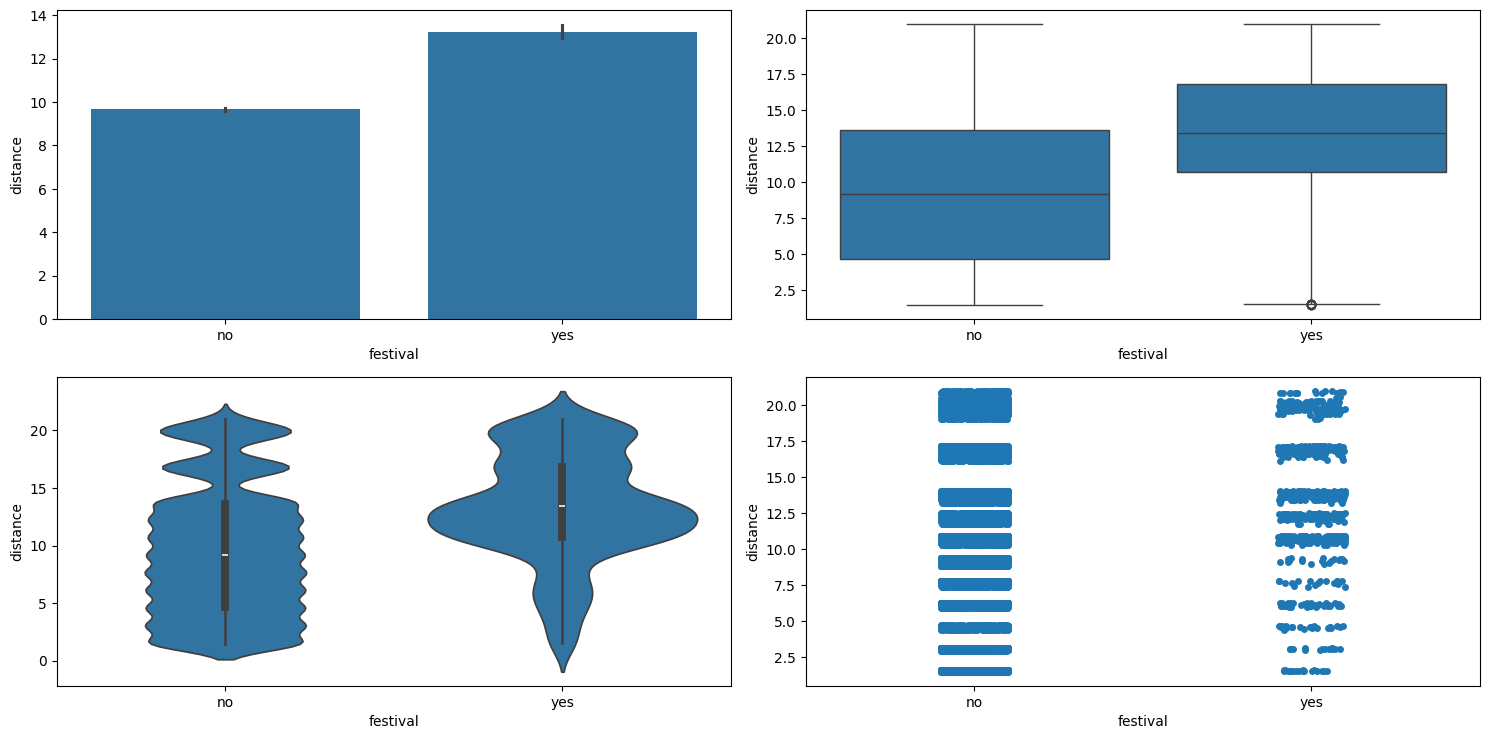

In [289]:
# do rider cover more distances during Festival

numerical_categorical_analysis(df_final,'distance','festival')